<font color='blood red'><font size="6">IMPORTANT !!! Paste this notebook link on <a href="https://nbviewer.org/">nbviewer.org</a> to view full notebook! Or else there will be missing visualitions if you view on Github!

Dependencies you might not have and need to install: <br>

conda install seaborn <br>
conda install -c conda-forge tensorflow <br>
conda install -c plotly plotly <br>
conda install -c conda-forge imbalanced-learn <br>
conda install -c conda-forge xgboost <br>
conda install -c conda-forge shap

![1.png](HeaderImages/Header.png)

<div>
<img src="HeaderImages/TableOfContents.png" width="500"/>
</div>
<a id='0'></a>

# 1. <a href='#1'>Introduction</a>

- 1.1 <a href='#1.1'>Libraries/Utilities</a>
- 1.2 <a href='#1.2'>Data Preprocessing</a>

# 2. <a href='#2'>Exploratory Data Analysis</a>

# 3. <a href='#3'>Data Balancing</a>

# 4. <a href='#4'>Modeling</a>
- 4.1  <a href='#4.1'>Logistic Regression</a>
- 4.2  <a href='#4.2'>Decision Tree </a>
- 4.3  <a href='#4.3'>Random Forest</a>
- 4.4  <a href='#4.4'>Support Vector Machine</a>
- 4.5  <a href='#4.5'>Artificial Neural Network</a>
- 4.6  <a href='#4.6'>eXtreme Gradient Boosting Classifier (XGBoost)</a>
- 4.7  <a href='#4.7'>K-nearest neighbours </a>
- 4.8  <a href='#4.8'>Naive Bayes Classifier </a>

# 5. <a href='#5'>Final Thoughts</a>

<a id='1'></a>
<div>
<img src="HeaderImages/Introduction.png" width="500"/>
</div>

<font color='blood red'><font size="5">Hypertension (High blood pressure) is a common condition in which the long-term force of the blood against the arteries of an individual cases health problems. These health problems include the failure of bodyparts to function at expected level, heart attack, and strokes. It is referred to as a "silent killer", as it tends to show no symptom until it has developed enough to pose serious health related concerns. What's more, nearly half of the Adults in America(47%, or 116 million) have hypertension, of which it was reported that high blood pressure was the leading cause of death in 516,995 people in America in 2019. Due to the prevalence of hypertension and its tendency to stay under the radar, it is of great importance to find it in its early stage. Hence our group decided to use various models to predict whether if an individual has hypertension, based on other health-related data. <br><br>
    
<font color=#4A235A ><font size="5"> For this project, we hope to identify the main predictors of Hypertension, and also identify the best model to predict Hypertension so that early treatment can occur.

Sources:
https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/symptoms-causes/syc-20373410
https://www.cdc.gov/bloodpressure/facts.htm#:~:text=Nearly%20half%20of%20adults%20in,are%20taking%20medication%20for%20hypertension.
https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045868

<a id='1.1'></a>
<div>
<img src="HeaderImages/Libraries.png" width="500"/>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,f1_score



<a id='1.2'></a>
<div>
<img src="HeaderImages/DataPre.png" width="500"/>
</div>

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

<font color='blood red'><font size="5">With a quick look at our data, smoking_status has more than 2 categories which may be possible to generalise into 2 categories (smoked and never smoked). </font> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<font color='blue'><font size="5">We have 12 rows,
11 features and 1 label. <br  /> However we can omit id as a feature. Hence we currently 
have 10 features to work with.

<font color='blood red'><font size="5">Numerical data: age, avg_glucose_level, BMI.</font> 

<font color='blood red'><font size="5">Categorical data: gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status, stroke.</font> 

In [4]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['gender_Cat'] = le.fit_transform(df['gender'])
df['married_Cat'] = le.fit_transform(df['ever_married'])
df['worktype_Cat'] = le.fit_transform(df['work_type'])
df['Residence_type_Cat'] = le.fit_transform(df['Residence_type'])


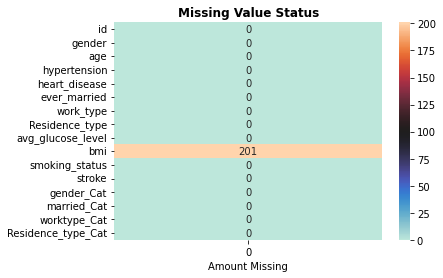

In [5]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='icefire')
ax.set_xlabel('Amount Missing')
plt.show()

<font color='blood red'><font size="5">As we can see, there are 201 missing data in BMI.</font> 

<a id='2'></a>
<div>
<img src="HeaderImages/EDA.png" width="500"/>
</div>

In [6]:
fig = ex.pie(df,names='hypertension')
fig.update_layout(title='<b>Proportion Of hypertension Samples<b>')
fig.show()

<font color='blood red'><font size="5">As to be seen, the dataset is very imbalanced.</font><br />

<font color='blood red'><font size="5">We will need to deal with this imbalanced dataset later.</font>

# Feature: Smoking status

In [7]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [8]:
len(df)

5110

<font color='blood red'><font size="5">Lets drop rows which has unknown smoking status.</font>

In [9]:
df = df.drop(df[df['smoking_status']=='Unknown'].index)
len(df)

3566

In [10]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

<font color='blood red'><font size="5">Let us combine formerly smoked and smokes to smokes.</font>

In [11]:
df.loc[(df['smoking_status'] == 'formerly smoked'), 'smoking_status'] = 'smokes'

In [12]:
fig = ex.pie(df,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Smoking Status Samples<b>')
fig.show()

In [13]:
#Encode smoke data
df['smoking_status_Cat'] = le.fit_transform(df['smoking_status'])

# Feature: BMI

<font color='blood red'><font size="5">Remember we had some missing values for BMI? Let us predict it with a simple regression model with age, gender,  hypertension and avg_glucose_level to fill in the missing value instead of naively inputting it with the mean or median.

In [14]:
bmi_pipe = Pipeline( steps=[
                            ('scaler',StandardScaler()),
                            ('LinReg',LinearRegression())
                              ])
X = df[['age','avg_glucose_level','hypertension','bmi']].copy()


In [15]:
Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(bmi_pipe.predict(Missing[['age','avg_glucose_level','hypertension']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3566 non-null   int64  
 1   gender              3566 non-null   object 
 2   age                 3566 non-null   float64
 3   hypertension        3566 non-null   int64  
 4   heart_disease       3566 non-null   int64  
 5   ever_married        3566 non-null   object 
 6   work_type           3566 non-null   object 
 7   Residence_type      3566 non-null   object 
 8   avg_glucose_level   3566 non-null   float64
 9   bmi                 3566 non-null   float64
 10  smoking_status      3566 non-null   object 
 11  stroke              3566 non-null   int64  
 12  gender_Cat          3566 non-null   int64  
 13  married_Cat         3566 non-null   int64  
 14  worktype_Cat        3566 non-null   int64  
 15  Residence_type_Cat  3566 non-null   int64  
 16  smokin

<font color='blood red'><font size="5">Distribution plot of BMI.<br /><br />

In [17]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['#1f77b4']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

<font color='orange'><font size="4">Seems like we have outliers in BMI. We will deal with them later below.

# Feature: Gender

In [18]:
df["gender"].value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

<font color='blood red'><font size="5">Remove 'Other' Gender since it is very little<br /><br />

In [19]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3565 non-null   int64  
 1   gender              3565 non-null   object 
 2   age                 3565 non-null   float64
 3   hypertension        3565 non-null   int64  
 4   heart_disease       3565 non-null   int64  
 5   ever_married        3565 non-null   object 
 6   work_type           3565 non-null   object 
 7   Residence_type      3565 non-null   object 
 8   avg_glucose_level   3565 non-null   float64
 9   bmi                 3565 non-null   float64
 10  smoking_status      3565 non-null   object 
 11  stroke              3565 non-null   int64  
 12  gender_Cat          3565 non-null   int64  
 13  married_Cat         3565 non-null   int64  
 14  worktype_Cat        3565 non-null   int64  
 15  Residence_type_Cat  3565 non-null   int64  
 16  smokin

# Summary of numerical features (.describe())

In [20]:
for i in ['age','avg_glucose_level', 'bmi']:
    print(df[i].describe())
    print("\n")

count    3565.000000
mean       48.860309
std        18.873140
min        10.000000
25%        34.000000
50%        50.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64


count    3565.000000
mean      108.972376
std        48.295550
min        55.120000
25%        77.460000
50%        92.650000
75%       116.670000
max       271.740000
Name: avg_glucose_level, dtype: float64


count    3565.000000
mean       30.321527
std         7.160116
min        11.500000
25%        25.400000
50%        29.385942
75%        33.900000
max        92.000000
Name: bmi, dtype: float64




<font color='blood red'><font size="5">Let us remove some outliers with the 1.5 IQR Rule.

In [21]:
IQR = df["avg_glucose_level"].quantile(0.75)-df["avg_glucose_level"].quantile(0.25)
upper = df["avg_glucose_level"].quantile(0.75)+1.5*IQR
lower = df["avg_glucose_level"].quantile(0.25)-1.5*IQR

IQR1 = df["bmi"].quantile(0.75)-df["bmi"].quantile(0.25)
upper1 = df["bmi"].quantile(0.75)+1.5*IQR1
lower1 = df["bmi"].quantile(0.25)-1.5*IQR1

index_out = df[(df["avg_glucose_level"]>upper) | (df["avg_glucose_level"]<lower) | (df["bmi"]>upper1) | (df["bmi"]<lower1) ].index
df.drop(index_out, inplace=True)

In [22]:
df.describe()

id          age  hypertension  heart_disease  \
count   2991.000000  2991.000000   2991.000000    2991.000000   
mean   36873.399866    46.978268      0.099967       0.048813   
std    21254.856077    18.798505      0.300006       0.215513   
min       67.000000    10.000000      0.000000       0.000000   
25%    18141.500000    32.000000      0.000000       0.000000   
50%    37545.000000    47.000000      0.000000       0.000000   
75%    55408.500000    61.000000      0.000000       0.000000   
max    72915.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke   gender_Cat  married_Cat  \
count        2991.000000  2991.000000  2991.000000  2991.000000  2991.000000   
mean           91.750461    29.258615     0.044801     0.386827     0.737546   
std            23.402486     5.972382     0.206902     0.487105     0.440042   
min            55.120000    14.100000     0.000000     0.000000     0.000000   
25%            74.870000    24.900000     0.000000     0.000000     0.000000   
50%            88.130000    28.700000     0.000000     0.000000     1.000000   
75%           103.850000    32.700000     0.000000     1.000000     1.000000   
max           175.290000    46.500000     1.000000     1.000000     1.000000   

       worktype_Cat  Residence_type_Cat  smoking_status_Cat  
count   2991.000000         2991.000000         2991.000000  
mean       1.917753            0.509863            0.463390  
std        0.925623            0.499986            0.498741  
min        0.000000            0.000000            0.000000  
25%        2.000000            0.000000            0.000000  
50%        2.000000            1.000000            0.000000  
75%        2.000000            1.000000            1.000000  
max        4.000000            1.000000            1.000000

In [23]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['#1f77b4']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

<font color='blue'><font size="4">BMI data seems much better now

<font color='blood red'><font size="5">Let us see the correlation matrices</font> 
    
<font color='blood red'><font size="3">Both Pearson and Spearman are used for measuring the correlation but the difference between them lies in the kind of analysis we want.

<font color='blood red'><font size="3">Pearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables.

<font color='blood red'><font size="3">Spearman correlation: Spearman correlation evaluates the monotonic relationship, meaning relationship in which the variables tend to move in the same/opposite direction but not necessarily at a constant rate.
   
<font color='blood red'><font size="3">The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

In [24]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Pearson Correlation', 
                                                                     'Spearman Correlation'))
s_val = df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1),
    row=1, col=1
)


s_val = df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlations")
fig.show()

<font color='blood red'><font size="5">colours are not very distinct from one another, which is due to the imbalanced proportion of hypertension samples.
So we use coefficients (hover over the correlation matrices) to observe.


<font color='blood red'><font size="5">As to be seen, the numerical data that correlates most to hypertension are age, heart_disease, stroke and BMI. <br /><br />
Lets observe hypertension sample distribution based on BMI and glucose level and
Hypertension Sample Distribution based on BMI and Age.

## Scatterplots 

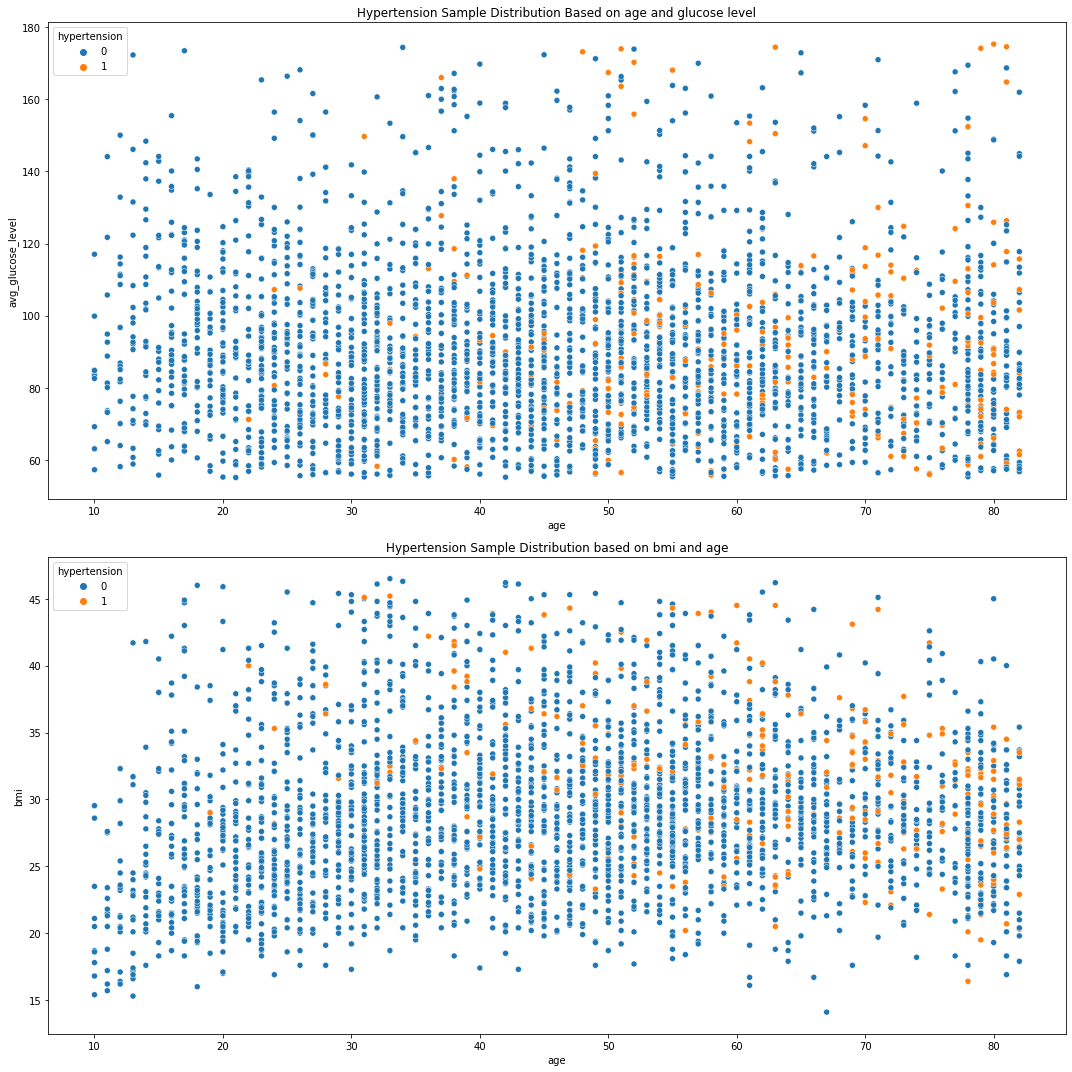

In [25]:
f, axs = plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
plt.title('Hypertension Sample Distribution Based on age and glucose level')
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue=df['hypertension'])
plt.subplot(2,1,2)
plt.title('Hypertension Sample Distribution based on bmi and age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['hypertension'])
plt.tight_layout()
plt.show()

<font color='blood red'><font size="5">Age is a very important factor in predicting hypertension. From the first figure we can see that most orange points are towards the right of the figure. This can also be observed in the second figure.

## KDE Plots 

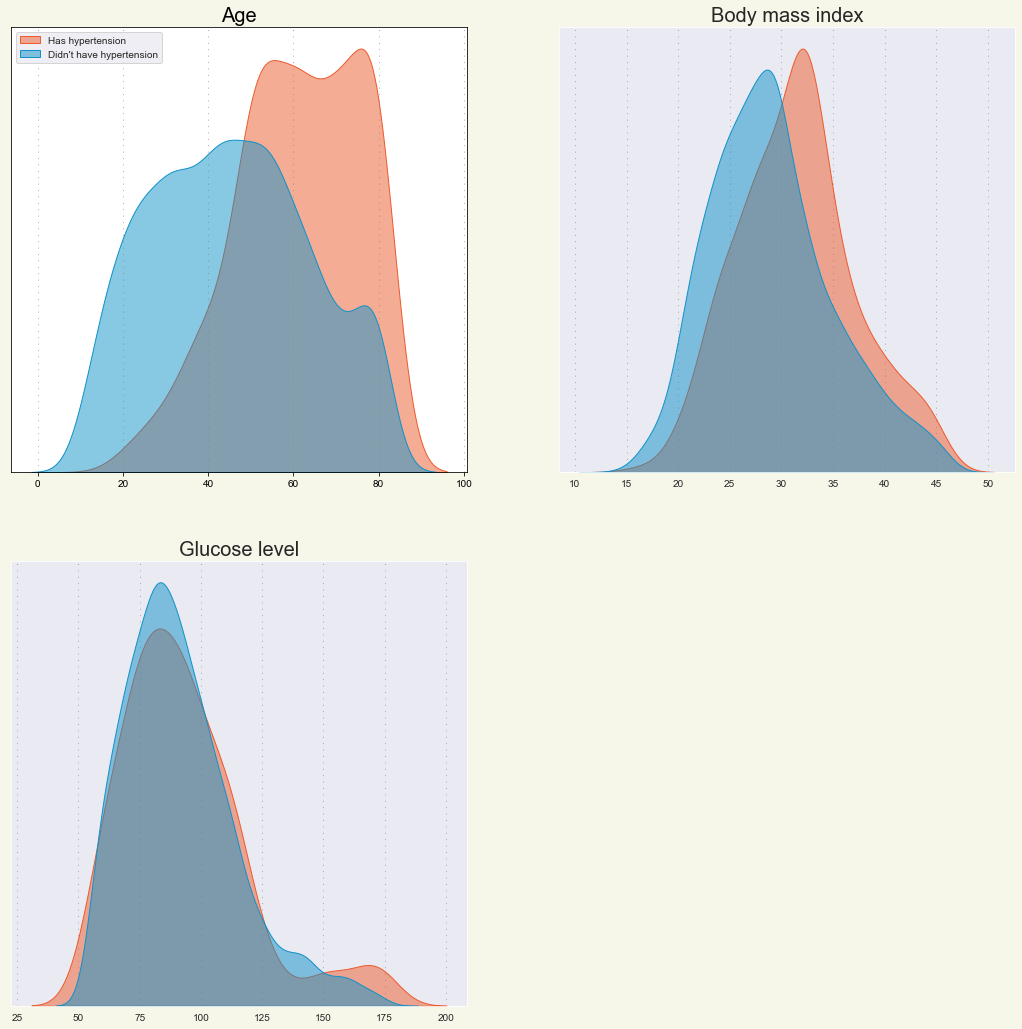

In [26]:
fig = plt.figure(figsize = (18, 18))
fig.patch.set_facecolor('#f6f6e9')

plt.subplot(221)
sns.set_style("dark")
plt.title('Age', size = 20)
sns.kdeplot(df.query('hypertension == 1')['age'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['age'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

plt.subplot(222)
plt.title('Body mass index', size = 20)
sns.kdeplot(df.query('hypertension == 1')['bmi'], color = '#ed5b2d', shade = True, label = 'Has hypertension', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['bmi'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.subplot(223)
plt.title('Glucose level', size = 20)
sns.kdeplot(df.query('hypertension == 1')['avg_glucose_level'], color = '#ed5b2d', shade = True, label = 'Has hypertenson', alpha = 0.5)
sns.kdeplot(df.query('hypertension == 0')['avg_glucose_level'], color = '#1092c9', shade = True, label = "Didn't have hypertension", alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend('').set_visible(False)

plt.show()

<font color='blood red'><font size="5">
KDE plot insights


The kde shows the density of the feature for each value of the target. There are usually 2 colored humps representing the 2 values of TARGET. If the humps are well-separated and non-overlapping, then there is a correlation with the TARGET. If the humps are overlapping a lot, then that means the feature is not well-correlated with the TARGET, because the TARGET is equally as common on those values of the feature.

From this understanding, age has correlation with hypertension while body mass index has less correlation and glucose levl has the least correlation with hypertension.

- above the age of 40, one is very likely to have hypertension especially above 50s.
  possible relationship between age and hypertension.


- BMI cannot tell anything (explore more later)

- glucose level < 140 is where one is very likely to not have hypertension. note: this is the range for a normal, healthy person.

- glucose level > 150 is where one is more likely to have hypertension.
  At around glucose level > 200 is where one is more likely to have hypertension.  
  Note: this is the range where one is considered diabetic. 

- possible relationship between glucose levels and hypertension.



<font color='Blue'><font size="4"> We now group the categorical features to increase interpretebility of data later.

In [27]:
stroke = df.copy()
# Create age groups
stroke['age_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 2] < 2:
        stroke.iloc[i, 17] = 'baby'
    elif stroke.iloc[i, 2] < 17 and stroke.iloc[i, 2] >= 2:
        stroke.iloc[i, 17] = 'child'
    elif stroke.iloc[i, 2] < 30 and stroke.iloc[i, 2] >= 17:
        stroke.iloc[i, 17] = 'young adults'
    elif stroke.iloc[i, 2] < 60 and stroke.iloc[i, 2] >= 30:
        stroke.iloc[i, 17] = 'middle-aged adults'
    elif stroke.iloc[i, 2] < 80 and stroke.iloc[i, 2] >= 60:
        stroke.iloc[i, 17] = 'old-aged adults'
    else:
        stroke.iloc[i, 17] = 'long-lived'
        
# Create bmi groups
stroke['bmi_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 9] < 18.5:
        stroke.iloc[i, 18] = 'Underweight'
    elif stroke.iloc[i, 9] < 25.0 and stroke.iloc[i, 9] >= 18.5:
        stroke.iloc[i, 18] = 'Normal weight'
    elif stroke.iloc[i, 9] < 30.0 and stroke.iloc[i, 9] >= 25.0:
        stroke.iloc[i, 18] = 'Overweight'
    else:
        stroke.iloc[i, 18] = 'Obese'
        
# Create glucose groups
stroke['glucose_group'] = 0
for i in range(len(stroke.index)):
    if stroke.iloc[i, 8] < 100:
        stroke.iloc[i, 19] = 'Normal'
    elif stroke.iloc[i, 8] >= 100 and stroke.iloc[i, 8] < 125:
        stroke.iloc[i, 19] = 'Prediabetes'
    else:
        stroke.iloc[i, 19] = 'Diabetes'

In [28]:
# Grouping by categorical features
dst_st_age = stroke.groupby(['age_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
stroke1 = stroke.groupby(['stroke', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
heart = stroke.groupby(['heart_disease', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
marry = stroke.groupby(['ever_married', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
work = stroke.groupby(['work_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
residence = stroke.groupby(['Residence_type', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
glucose_group = stroke.groupby(['glucose_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
bmi_group = stroke.groupby(['bmi_group', 'hypertension']).agg({'hypertension': 'count'}).rename(columns = {'hypertension': 'count'}).reset_index()
smoking = stroke.query('smoking_status != "Unknown"').groupby(['smoking_status', 'hypertension']).agg({'hypertension': 'count'})\
.rename(columns = {'hypertension': 'count'}).reset_index()

# Create percent column for data frames
def percent(data):
    data['percent'] = 0
    for i in range(len(data.index)):
        if i < len(data.index)-1:
            if data.iloc[i, 0] == data.iloc[i+1, 0]:
                data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i+1, 2])) * 100, 1)
            elif data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
        else:
            if data.iloc[i, 0] == data.iloc[i-1, 0]:
                data.iloc[i, 3] = 100 - data.iloc[i-1, 3]
            else:
                data.iloc[i, 3] = 100.0
            
percent(dst_st_age)
percent(stroke1)
percent(heart)
percent(marry)
percent(work)
percent(residence)
percent(glucose_group)
percent(bmi_group)
percent(smoking)


In [29]:
bmi_group.head()

bmi_group  hypertension  count  percent
0  Normal weight             0    665     94.3
1  Normal weight             1     40      5.7
2          Obese             0   1022     85.0
3          Obese             1    181     15.0
4     Overweight             0    960     92.6

In [30]:
stroke.head(20)

id  gender   age  hypertension  heart_disease ever_married  \
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
15  58202  Female  50.0             1              0          Yes   
18  27458  Female  60.0             0              0           No   
24   4219    Male  71.0             0              0          Yes   
25  70822    Male  80.0             0              0          Yes   
26  38047  Female  65.0             0              0          Yes   
34  14248    Male  48.0             0              0           No   
35    712  Female  82.0             1              1           No   
37  24977  Female  72.0             1              0          Yes   
39  62602  Female  49.0             0              0          Yes   
40   4651    Male  78.0             0              0          Yes   
41   1261    Male  54.0             0              0          Yes   
42  61960    Male  82.0             0              1          Yes   

        work_type Residence_type  avg_glucose_level   bmi smoking_status  \
2         Private          Rural             105.92  32.5   never smoked   
3         Private          Urban             171.23  34.4         smokes   
4   Self-employed          Rural             174.12  24.0   never smoked   
6         Private          Rural              70.09  27.4   never smoked   
7         Private          Urban              94.39  22.8   never smoked   
10        Private          Rural              80.43  29.7   never smoked   
11       Govt_job          Rural             120.46  36.8         smokes   
12        Private          Urban             104.51  27.3         smokes   
15  Self-employed          Rural             167.41  30.9   never smoked   
18        Private          Urban              89.22  37.8   never smoked   
24        Private          Urban             102.87  27.2         smokes   
25  Self-employed          Rural             104.12  23.5   never smoked   
26        Private          Rural             100.98  28.2         smokes   
34       Govt_job          Urban              84.20  29.7   never smoked   
35        Private          Rural              84.03  26.5         smokes   
37        Private          Rural              74.63  23.1         smokes   
39        Private          Urban              60.91  29.9   never smoked   
40        Private          Rural              78.03  23.9         smokes   
41        Private          Urban              71.22  28.5   never smoked   
42        Private          Urban             144.90  26.4         smokes   

    stroke  gender_Cat  married_Cat  worktype_Cat  Residence_type_Cat  \
2        1           1            1             2                   0   
3        1           0            1             2                   1   
4        1           0            1             3                   0   
6        1           1            1             2                   0   
7        1           0            0             2                   1   
10       1           0            1             2                   0   
11       1           0            1             0                   0   
12       1           0            1             2                   1   
15       1           0            1             3                   0   
18       1           0            0             2                   1   
24       1           1            1             2                   1   
25       1           1            1             3                   0   
26       1 

In [31]:
dst_st_age

age_group  hypertension  count  percent
0               child             0    132    100.0
1          long-lived             0     82     73.2
2          long-lived             1     30     26.8
3  middle-aged adults             0   1413     91.9
4  middle-aged adults             1    124      8.1
5     old-aged adults             0    572     80.7
6     old-aged adults             1    137     19.3
7        young adults             0    493     98.4
8        young adults             1      8      1.6

## Barplots 

In [32]:
dst_st_age.iloc[[2,4,6,8], 1] = "Had hypertension"
dst_st_age.iloc[[0,1,3,5,7], 1] = "Didn't have hypertension"

stroke1.iloc[[0,1], 0] = 'No stroke'
stroke1.iloc[[2,3], 0] = 'Stroke'

heart.iloc[[0,1], 0] = 'No heart diseases'
heart.iloc[[2,3], 0] = 'Heart diseases'

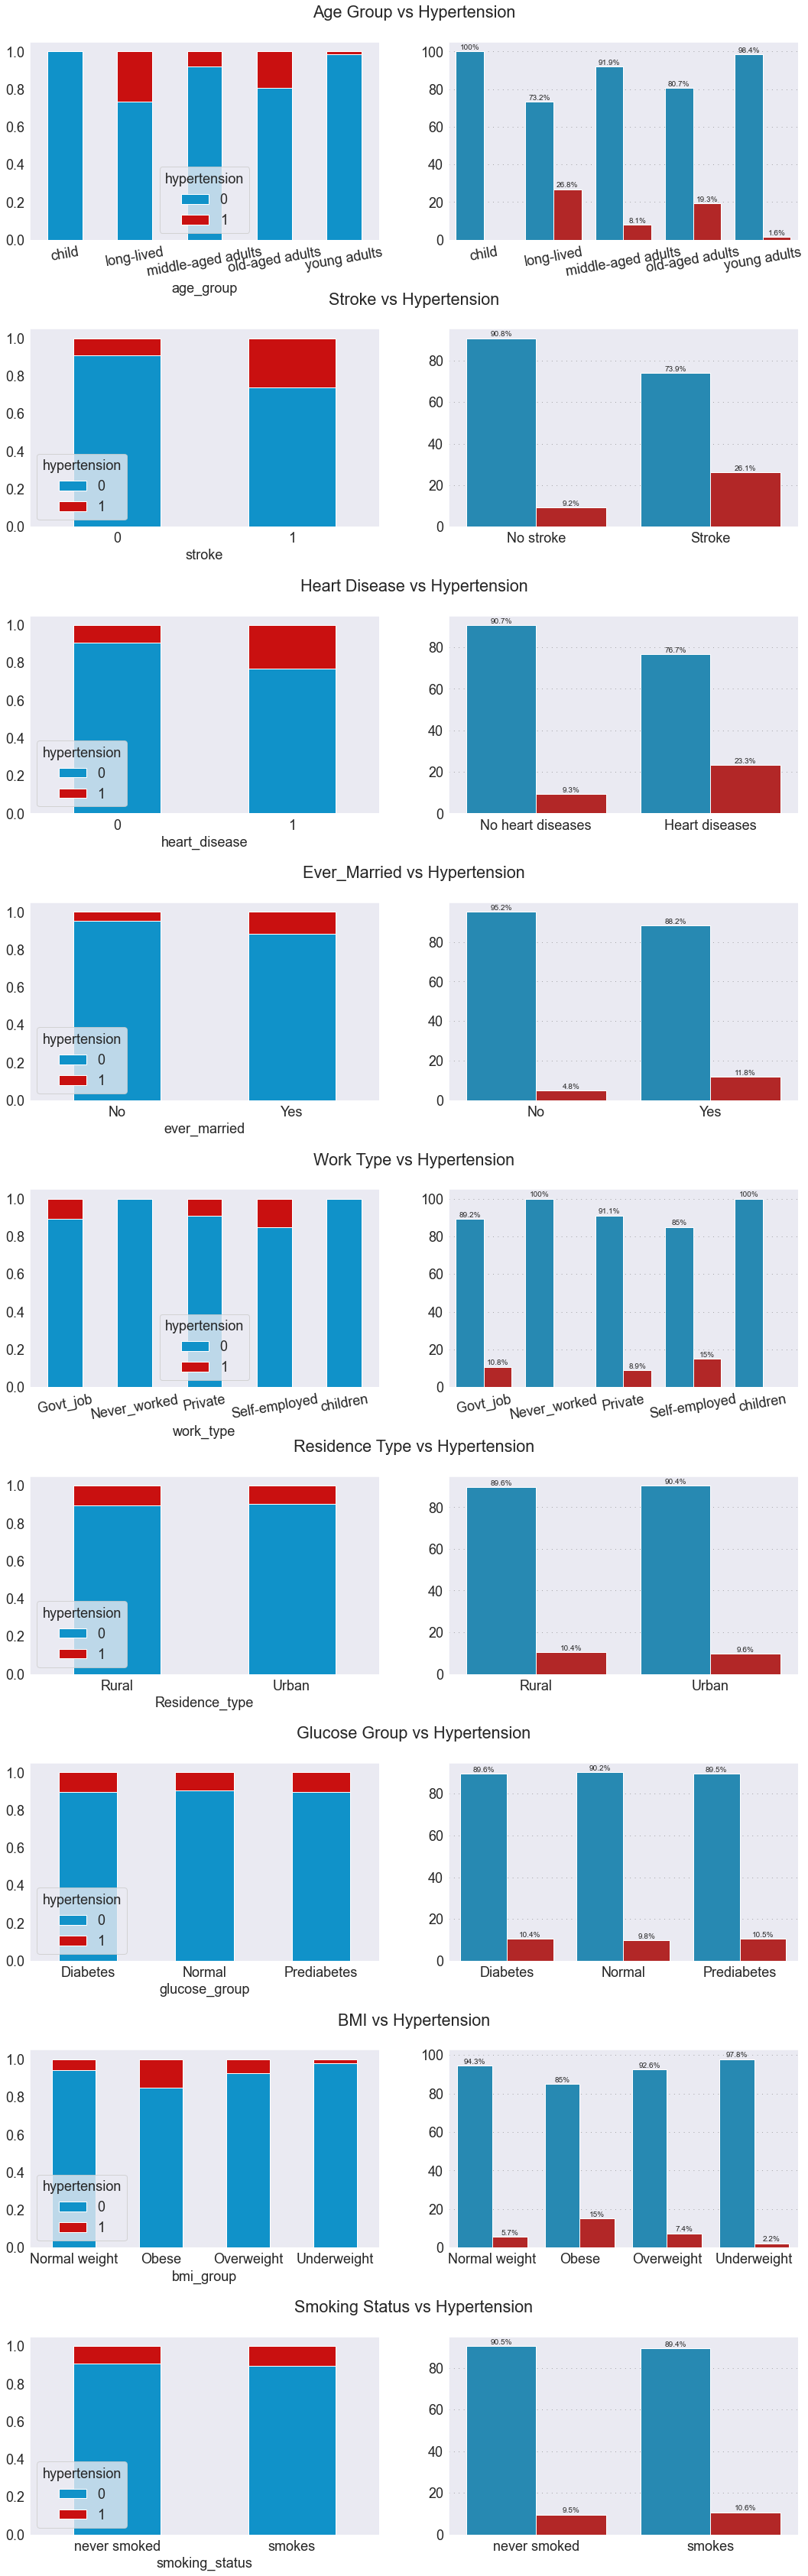

In [33]:
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams.update({'font.size': 18})
ax.tick_params(labelrotation=45)
fig.tight_layout()
fig.patch.set_facecolor('#fafafa')
f, axes = plt.subplots(9, 2, figsize=(18,60))
f.subplots_adjust(hspace=.45)


table=pd.crosstab(stroke.age_group,stroke.hypertension)
a=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[0,0],  color = ['#1092c9','#c91010'],rot = 10)
axes[0,0].set_title('Age Group vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,2)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a2 = sns.barplot(data = dst_st_age, x = dst_st_age['age_group'], y = dst_st_age['percent'], hue = dst_st_age['hypertension'], palette = ['#1092c9','#c91010',])
plt.xticks(rotation = 10)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########

table=pd.crosstab(stroke.stroke,stroke.hypertension)
b=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[1,0],  color = ['#1092c9','#c91010',],rot=0)
axes[1,0].set_title('Stroke vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,4)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
b2 = sns.barplot(data = stroke1, x = stroke1['stroke'], y = stroke1['percent'], hue = stroke1['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########

table=pd.crosstab(stroke.heart_disease,stroke.hypertension)
c=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[2,0], color = ['#1092c9','#c91010',],rot=0)
axes[2,0].set_title('Heart Disease vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,6)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
c2 = sns.barplot(data = heart, x = heart['heart_disease'], y = heart['percent'], hue = heart['hypertension'], palette = ['#1092c9','#c91010',])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

##########
table=pd.crosstab(stroke.ever_married,stroke.hypertension)
d=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[3,0], color = ['#1092c9','#c91010',],rot=0)
axes[3,0].set_title('Ever_Married vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,8)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
d2 = sns.barplot(data = marry, x = marry['ever_married'], y = marry['percent'], hue = marry['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.work_type,stroke.hypertension)
e=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[4,0], color = ['#1092c9','#c91010',],rot=10)
axes[4,0].set_title('Work Type vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,10)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
e2 = sns.barplot(data = work, x = work['work_type'], y = work['percent'], hue = work['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 10)
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.Residence_type,stroke.hypertension)
f=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[5,0], color = ['#1092c9','#c91010',],rot=0)
axes[5,0].set_title('Residence Type vs Hypertension', y=1.1 , x=1.1)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,12)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
f2 = sns.barplot(data = residence, x = residence['Residence_type'], y = residence['percent'], hue = residence['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########

table=pd.crosstab(stroke.glucose_group,stroke.hypertension)
g=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[6,0], color = ['#1092c9','#c91010'],rot=0)
axes[6,0].set_title('Glucose Group vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
g2 = sns.barplot(data = glucose_group, x = glucose_group['glucose_group'], y = glucose_group['percent'], hue = glucose_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.bmi_group,stroke.hypertension)
h=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[7,0],color = ['#1092c9','#c91010'],rot=0)
axes[7,0].set_title('BMI vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,16)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
h2 = sns.barplot(data = bmi_group, x = bmi_group['bmi_group'], y = bmi_group['percent'], hue = bmi_group['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
table=pd.crosstab(stroke.smoking_status, stroke.hypertension)
j=table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax = axes[8,0],color = ['#1092c9','#c91010'],rot=0)
axes[8,0].set_title('Smoking Status vs Hypertension', y=1.1 , x=1.1)
plt.subplot(9,2,18)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
j2 = sns.barplot(data = smoking, x = smoking['smoking_status'], y = smoking['percent'], hue = smoking['hypertension'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
##########
# add annotations

for i in [a2,b2,c2,d2,e2,f2,g2,h2,j2]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
        
plt.show()

<font color='blood red'><font size="5">based on barplots <br /><br />

1) Age Group

 - long-lived and middle-aged adults are more likely to have hypertension.
 - strong correlation between age group and hypertension.

2) Stroke and Heart Diseases
- strong correlation between stroke and hypertension.
- strong correlation between heart diseases and hypertension.
- However, this can still happen to those who did not have stroke or heart diseases given available data.

3) Ever Married
- weak correlation between marriage status and hypertension.
- if ever married, there is higher risk of hypertension.

4) Work Type
- percentages for govt job, private and self-employed are very similar.
- note that the data is very imbalanced. (alot of private, everything else very little)
- hard to check relationship as there are only 14 who never worked, which is a stark difference in data amount compared to the rest.

5) Residence Type
- residence type do not seem to affect since the percentages are quite similar.
- not much correlation.

6) Glucose Group
- those with diabetes are more likely to have hypertension.
- strong correlation between glucose levels and hypertension.

7) BMI
- those who are obese are more likely to have hypertension.
- strong correlation between BMI and hypertension.

8) Smoking
- smoking do not seem to affect since the percentages are quite similar.
- not much correlation.

<font color='purple'><font size="5"> Let's take a closer look at the effect of age on hyptertension.

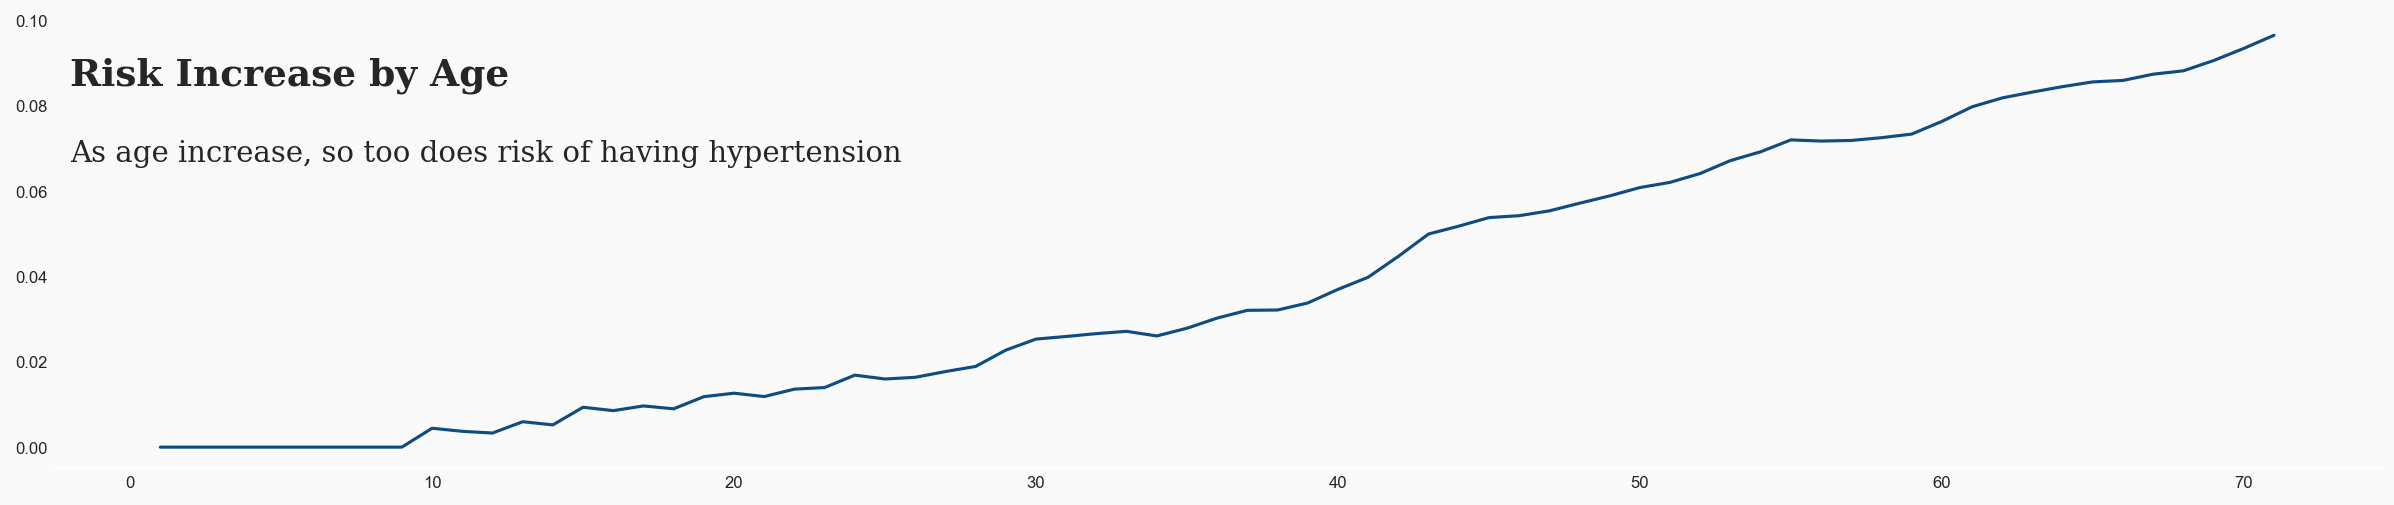

In [34]:
background_color = "#fafafa"
fig = plt.figure(figsize=(20, 10), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['hypertension'].sum() / len(df[df['age'] < i]['hypertension']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-2,0.085,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-2,0.067,'As age increase, so too does risk of having hypertension',fontsize=14,fontfamily='serif')


plt.show()

# Label: Hypertension

In [35]:
df['hypertension'].value_counts()

0    2692
1     299
Name: hypertension, dtype: int64

<font color='blood red'><font size="5"><a href='#2'>As mentioned earlier, we have an imbalanced data.</a><br /><br />
<font color='blood red'><font size="3">Standard ML methods, such as Decision Tree and Logistic Regression, tend to deviate from the majority class and tend to ignore the minority class.<br /><br />
    They tend to only predict the majority class, hence have a significant misclassification of the minority class as compared to the majority class. 
    
<font color='blood red'><font size="3"> So, we should to do <font color=#FF1493>SMOTE (Synthetic Minority Over-sampling Technique)</font> - one of the most commonly used resampling techniques to solve the imbalance problem.

<a id='3'></a>
<div>
<img src="HeaderImages/DataBalancing.png" width="500"/>
</div>

<font color=#4B0082><font size="5">First we Standardise the data

In [36]:

df1 = df.copy()
X=df1.copy().drop(['hypertension','id', 'gender','ever_married', 'work_type','Residence_type','smoking_status'],axis=1)
y=df1['hypertension']

In [37]:
  
X[['age','avg_glucose_level','bmi']] = StandardScaler().fit_transform(X[['age','avg_glucose_level','bmi']])
X.head()

age  heart_disease  avg_glucose_level       bmi  stroke  gender_Cat  \
2  1.756908              1           0.605573  0.542820       1           1   
3  0.107565              0           3.396769  0.861004       1           0   
4  1.703704              0           3.520280 -0.880636       1           0   
6  1.437681              1          -0.925717 -0.311254       1           1   
7  1.171658              0           0.112808 -1.081594       1           0   

   married_Cat  worktype_Cat  Residence_type_Cat  smoking_status_Cat  
2            1             2                   0                   0  
3            1             2                   1                   1  
4            1             3                   0                   0  
6            1             2                   0                   0  
7            0             2                   1                   0

# SMOTE (Synthetic Minority Over-sampling Technique)

In [38]:
y.head()

2    0
3    0
4    1
6    1
7    0
Name: hypertension, dtype: int64

<font color=#1E90FF><font size="5">We train test split first then use the synthetic sampling technique

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_balanced, X_test, Y_balanced, y_test = train_test_split(X,y, test_size = 0.2)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_balanced, Y_balanced)

X_train_balanced_list=X_train_balanced.columns.values.tolist()

print(X_train_balanced_list)

['age', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Cat', 'married_Cat', 'worktype_Cat', 'Residence_type_Cat', 'smoking_status_Cat']


In [40]:
X_train_balanced.shape

(4306, 10)

In [41]:
from collections import Counter
print(Counter(Y_train_balanced))
print(Counter(y_test))

Counter({0: 2153, 1: 2153})
Counter({0: 539, 1: 60})


<font color=#B22222><font size="5">Our training data is now balanced and standardised!

In [42]:
X_train_balanced.describe()

age  heart_disease  avg_glucose_level          bmi  \
count  4306.000000    4306.000000        4306.000000  4306.000000   
mean      0.311514       0.039248           0.020018     0.174040   
std       0.963399       0.194206           1.023012     0.974014   
min      -1.967414       0.000000          -1.565500    -2.538543   
25%      -0.371276       0.000000          -0.688322    -0.528959   
50%       0.373589       0.000000          -0.146547     0.124156   
75%       1.116234       0.000000           0.505380     0.731721   
max       1.863318       1.000000           3.570283     2.887335   

            stroke   gender_Cat  married_Cat  worktype_Cat  \
count  4306.000000  4306.000000  4306.000000   4306.000000   
mean      0.042499     0.350441     0.777055      1.884812   
std       0.201748     0.477164     0.416270      0.916600   
min       0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     1.000000      2.000000   
50%       0.000000     0.000000     1.000000      2.000000   
75%       0.000000     1.000000     1.000000      2.000000   
max       1.000000     1.000000     1.000000      4.000000   

       Residence_type_Cat  smoking_status_Cat  
count         4306.000000         4306.000000  
mean             0.462843            0.441709  
std              0.498675            0.496648  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%              0.000000            0.000000  
75%              1.000000            1.000000  
max              1.000000            1.000000

<a id='4'></a>
<div>
<img src="HeaderImages/Modeling.png" width="500"/>
</div>

<font color='blood red'><font size="5">which should we focus on?

- <font color='blood red'><font size="3"> Precision = (True Positive) / (Total predicted positive)
   
- <font color='blood red'><font size="3"> Recall = (True Positive) / (True Positive + False Negative)

- <font color='blood red'><font size="3"> F1 = 2* ( precision * recall) / (precision + recall)

<font color='blood red'><font size="4"> Since we are predicting hypertension, the impact of False Negatives are much more undesirable as compared to False Positives. <font color=#191970><font size="4">It is worse for a patient to go undiagnosed and fail to receive proper treatment, than to have a minor false scare about having hypertension. (when one does not have it)
Thus it makes sense to focus more on Recall instead of other metrics.

<font color='blood red'><font size="4"> However, precision can tell us how accurate/precise our model is out of those predicted positive, how many are actual positive, which is an important aspect too.

<font color='blood red'><font size="4"> F1 score allows us to seek a balance between Precision and Recall. While it may seem like a good measure, this means that we are compromising on Recall.
    
<font color='blood red'><font size="4"> Going back to the reasons why we wanted to do this project, hypertension is like a <font color=#228B22><font size="5">'silent killer'</font><font color='blood red'><font size="4">, thus our priority should be on minimising the number of False Negatives.
    
<font color=#FF4500><font size="5">
Hence, we focus on <font color=#FF69B4><font size="7">Recall</font><font color=#FF4500> scores where hypertension=1.
    
<font color=#4B0082><font size="4">RFE, in-built Feature Importance methods and SHAP are used to determine feature importance so that we can gain insight on what are the main predictors of Hypertension. Brief introductions to these methods will be given when we use them.
<br>

<a id='4.1'></a>
<div>
<img src="HeaderImages/LogReg.png" width="500"/>
</div>

<font color=#8A2BE2><font size="4">Wikipedia:<br>
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.<br><br>
Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".

<font color=#8B4513><font size="4">First we use feature selection method<font color=#4169E1><font size="4"> RFE (Recursive Feature Elimination)<font color=#8B4513><font size="4"> to deduce the more important features by reoving the weakest features. We select n=4 features in this case.

In [43]:
import shap
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=600)
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit.support_ ,'Feature Ranking':fit.ranking_}
rfe_df = pd.DataFrame(features)
rfe_df

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age               True                1
1       heart_disease               True                1
2   avg_glucose_level              False                7
3                 bmi               True                1
4              stroke               True                1
5          gender_Cat              False                4
6         married_Cat              False                2
7        worktype_Cat              False                6
8  Residence_type_Cat              False                3
9  smoking_status_Cat              False                5

In [44]:
df = pd.concat([X_train_balanced, Y_train_balanced],axis = 1)

<font color='blood red'><font size="4">Features picked by RFE:<font color=#9370DB> age, heart disease, bmi, Residence type<br /><br />

## Classification report with model wrapped with RFE (4 features):

In [45]:
y_pred = fit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77       539
           1       0.18      0.68      0.28        60

    accuracy                           0.65       599
   macro avg       0.56      0.66      0.52       599
weighted avg       0.87      0.65      0.72       599



## Classification report with standard model with all features:

In [46]:
fit1 = model.fit(X_train_balanced, Y_train_balanced)
y_pred1 = fit1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       539
           1       0.17      0.62      0.27        60

    accuracy                           0.67       599
   macro avg       0.56      0.65      0.53       599
weighted avg       0.86      0.67      0.73       599



### Feature importance from coefficient size:

In [47]:
ft_imp = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(10))
for i in range(len(ft_imp.index)):
    ft_imp.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
ft_imp['importance (abs coef)'] = abs(model.coef_)[0]
ft_imp = ft_imp.sort_values('importance (abs coef)', ascending = False)
ft_imp[0:12].style.background_gradient(cmap = 'Blues')

<font color='blood red'><font size="4">As to be seen, the 4 most important features in this case are: <font color=#9370DB>age, heart disease, bmi and residence type.<br><br>
<font color='blood red'><font size="4">As compared to the one's selcted by RFE, the common features are: <font color=#7D6608><font size="4">age, heart disease, bmi and residenc type, same as RFE.

## Confusion matrix of model with all features: 

<AxesSubplot:>

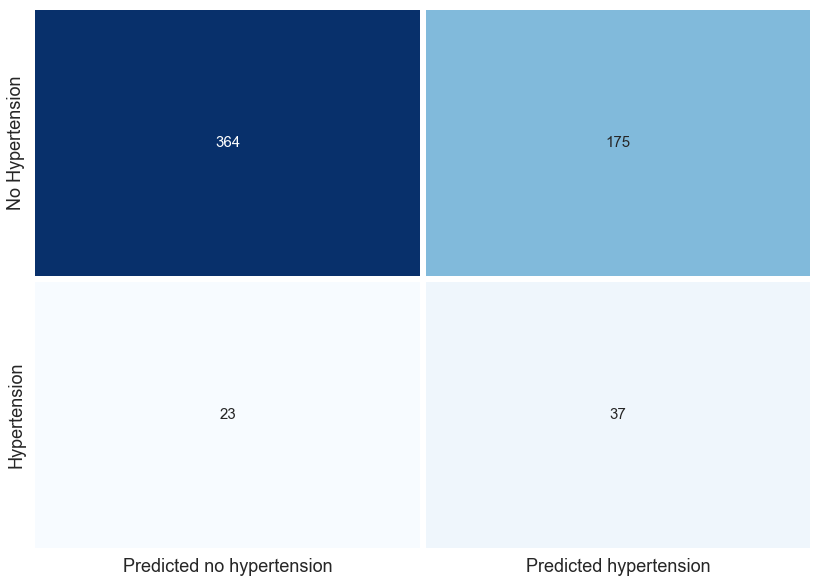

In [48]:
plt.rcParams['figure.figsize'] = 14, 10
lr_cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(lr_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Recall score is mediocre.

<a id='4.2'></a>
<div>
<img src="HeaderImages/DecisionTree.png" width="500"/>
</div>

<font color='blood red'><font size="5">Prior to predicting hypertension with random forest, a simple decision tree model will first be observed.

<font color=#228B22><font size="4">A Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression problems. A decision tree is simply a series of sequential decisions made to reach a specific result.<br><br>
 But often, a single tree is not sufficient for producing effective results. <br><br>
 Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions.<br><br>
 The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output.

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#constructing a tree 
tree_dpt = DecisionTreeClassifier()

## Grid Search to determine best hyperparameters 

<font color='green'><font size="4">Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

In [50]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid = GridSearchCV(tree_dpt, tree_param, scoring='recall')
grid.fit(X_train_balanced,Y_train_balanced)
grid.best_params_

{'criterion': 'gini', 'max_depth': 120}

### Using criterion = 'gini' and max_depth=120

In [61]:
tree_dpt2 = DecisionTreeClassifier(criterion='gini',max_depth = 120)
tree_dpt2.fit(X_train_balanced, Y_train_balanced)

DecisionTreeClassifier(max_depth=120)

In [62]:
from sklearn.tree import plot_tree

Scroll down in the cell to see decison tree figure

<a href='#4.21'>CLICK HERE TO SKIP TO END OF NEXT CELL!!!</a>

[Text(245.94301601823904, 639.7753846153846, 'age <= 0.055\ngini = 0.5\nsamples = 4306\nvalue = [2153, 2153]\nclass = N'),
 Text(66.50217049752692, 614.6861538461538, 'bmi <= 0.376\ngini = 0.357\nsamples = 1614\nvalue = [1238, 376]\nclass = N'),
 Text(20.80688972941519, 589.5969230769231, 'age <= -0.46\ngini = 0.141\nsamples = 960\nvalue = [887, 73]\nclass = N'),
 Text(9.195554262438174, 564.5076923076923, 'bmi <= -0.226\ngini = 0.057\nsamples = 648\nvalue = [629, 19]\nclass = N'),
 Text(5.610846668606343, 539.4184615384615, 'bmi <= -0.32\ngini = 0.004\nsamples = 466\nvalue = [465, 1]\nclass = N'),
 Text(4.363991853360489, 514.3292307692308, 'gini = 0.0\nsamples = 430\nvalue = [430, 0]\nclass = N'),
 Text(6.857701483852197, 514.3292307692308, 'bmi <= -0.312\ngini = 0.054\nsamples = 36\nvalue = [35, 1]\nclass = N'),
 Text(5.610846668606343, 489.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(8.104556299098052, 489.24, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]\nclass = 

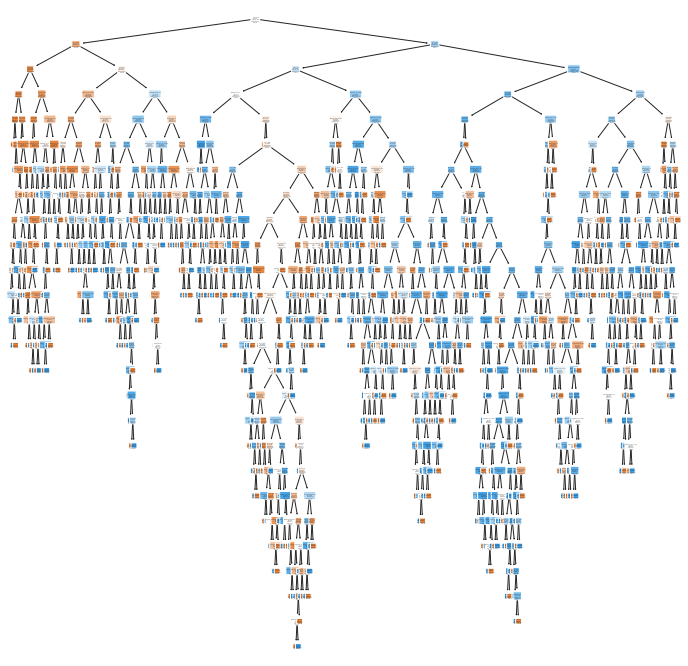

In [63]:
f = plt.figure(figsize=(12,12))
plot_tree(tree_dpt2, filled=True, rounded=True,
         feature_names=X_train_balanced.columns,
         class_names=["N", "Y"])

<a id='4.21'><a>

In [64]:
y_pred = tree_dpt2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       539
           1       0.15      0.32      0.20        60

    accuracy                           0.74       599
   macro avg       0.53      0.55      0.52       599
weighted avg       0.84      0.74      0.78       599



<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Recall for hypertension = 0 is bad, but for hypertension = 1 is quite good

In [65]:
f_imp1 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp1.index)):
    f_imp1.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp1['importance'] =tree_dpt2.feature_importances_
f_imp1 = f_imp1.sort_values('importance', ascending = False)
f_imp1[0:12].style.background_gradient(cmap = 'Blues')

<font color='blood red'><font size="4">For this Decision Tree, the 2 most important features in this case are: <font color=#9370DB>age and bmi.<br><br>

## Confusion Matrix 

<AxesSubplot:>

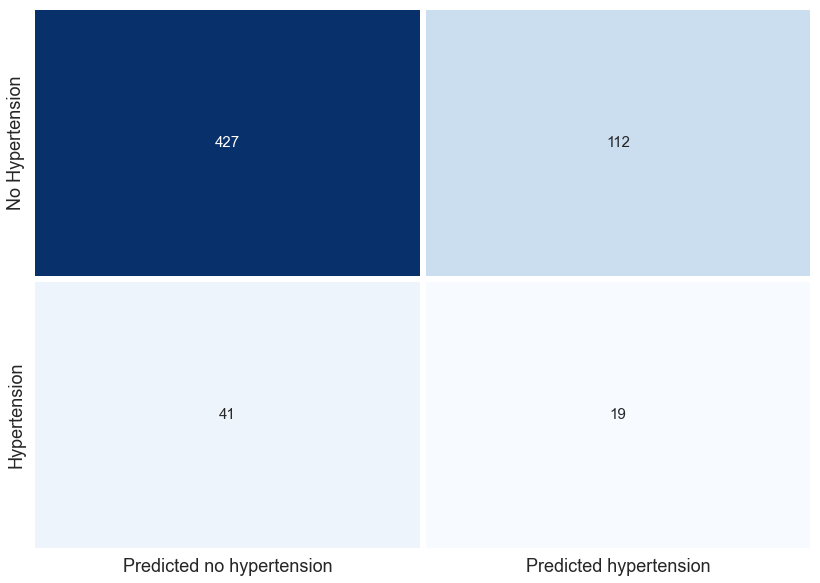

In [66]:
y_pred = tree_dpt2.predict(X_test)

dt_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(dt_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])


<a id='4.3'></a>
<div>
<img src="HeaderImages/RandomForest.png" width="500"/>
</div>

# Random Forest

In [67]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
fit = model.fit(X_train_balanced, Y_train_balanced)


## GridSearch to determine best hyperparameters 

<font color='green'><font size="4">Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.


In [69]:
grid = GridSearchCV(rfc,param_grid, scoring='recall')

In [70]:
grid.fit(X_train_balanced,Y_train_balanced)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 5, 7],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='recall')

In [71]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 200}

The 'best' hyperparameters are bootstrap=True, max_features=3, n_estimators=200

In [72]:
rfc = RandomForestClassifier(max_features=3,n_estimators=200,bootstrap=True)

In [73]:
rfc.fit(X_train_balanced,Y_train_balanced)

RandomForestClassifier(max_features=3, n_estimators=200)

In [74]:
rfc.score(X_test, y_test)

0.7896494156928213

In [75]:
y_pred=rfc.predict(X_test)

## Feature importance from Random Forest Classifier:

In [76]:
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp2['importance'] =rfc.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:12].style.background_gradient(cmap = 'Blues')

<font color=#800080><font size="4">Random Forest picked up: <font color=#800000><font size="4">age, bmi and average glucose level <font color=#800080><font size="4">as top important features. <br>


## Using SHAP 

<font color=#9370DB><font size=4>SHAP (SHapley Additive exPlanations) by Lundberg and Lee (2017) is a method to explain individual predictions. <br>
    
<font color='Purple'><font size=4>  The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory.

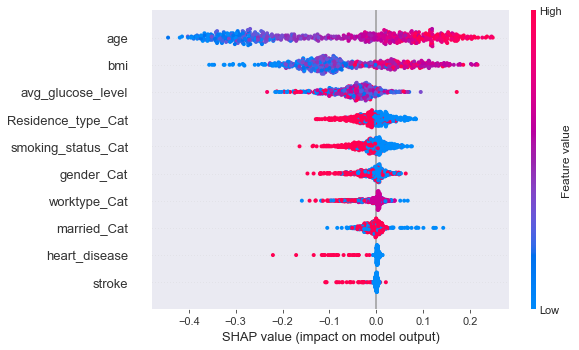

In [77]:
import copy

sample = shap.sample(X_train_balanced, 100)
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap_values1 = explainer(X_test)
shap_values2 = copy.deepcopy(shap_values1)
shap_values2.values = shap_values2.values[:,:,1]
shap_values2.base_values = shap_values2.base_values[:,1]

shap.plots.beeswarm(shap_values2)


<font color=#800080><font size="4"> SHAP has also picked up  <font color=#800000><font size="4">age, bmi and avg_glucose level <font color=#800080><font size="4">as the 3 most important features.</font>

### Classification Report 

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       539
           1       0.15      0.23      0.18        60

    accuracy                           0.79       599
   macro avg       0.53      0.54      0.53       599
weighted avg       0.83      0.79      0.81       599



## Confusion matrix 

<AxesSubplot:>

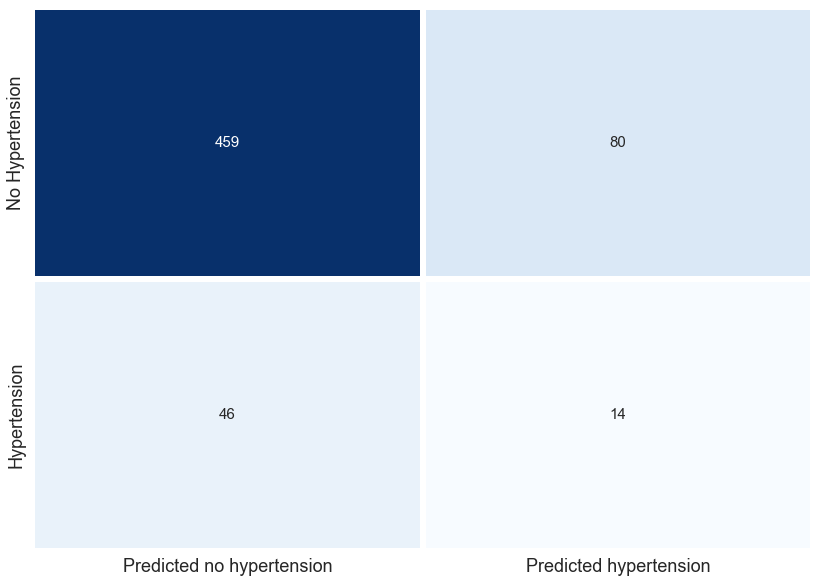

In [79]:
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])


<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Recall for hypertension = 1 is very bad, but for hypertension = 0 is quite good. Opposite of the Decision Tree. 
-<font color='blood red'><font size="4">However, accuracy for Random Forest is much better than Decision Tree.
  


<a id='4.4'></a>
<div>
<img src="HeaderImages/SVM.png" width="500"/>
</div>

# Support Vector Machine

<font color=#778899><font size="4">Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. They are effective in high dimensional spaces.

In [80]:
svc = SVC()
svc.fit(X_train_balanced, Y_train_balanced)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       539
           1       0.16      0.57      0.25        60

    accuracy                           0.66       599
   macro avg       0.55      0.62      0.52       599
weighted avg       0.86      0.66      0.73       599



## Feature importance with SHAP 

  0%|          | 0/100 [00:00<?, ?it/s]

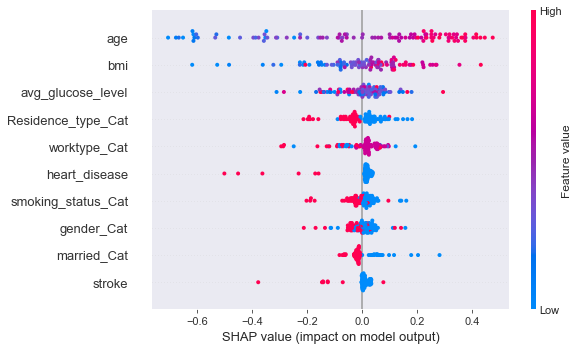

In [81]:
svc_explainer = shap.KernelExplainer(svc.predict,sample)
svc_shap_values = svc_explainer.shap_values(sample)
shap.summary_plot(svc_shap_values,sample)

<font color=#800080><font size="4"> SHAP has picked up  <font color=#800000><font size="4">age and bmi <font color=#800080><font size="4">as the most important features.</font>

## Confusion Matrix 

<AxesSubplot:>

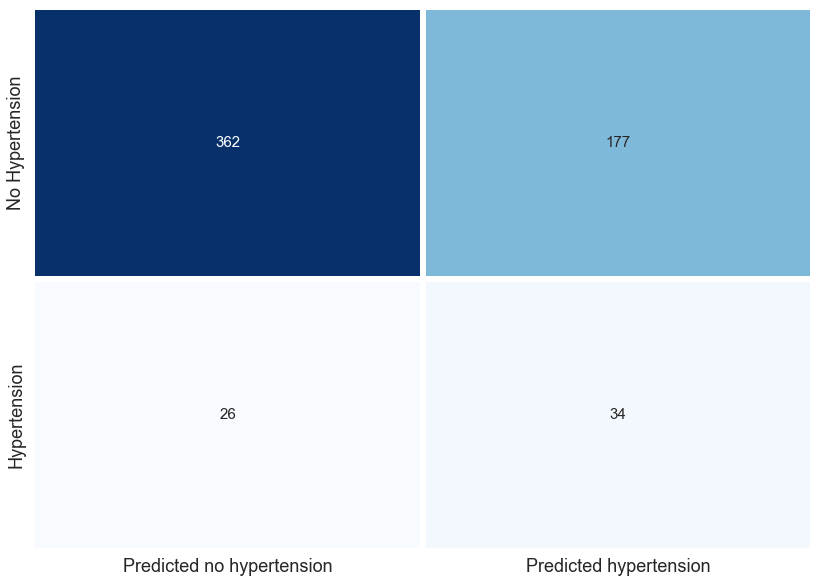

In [82]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Recall for hypertension=1 is quite good.
- <font color='blood red'><font size="4"> However, Recall for hypertension=0 is mediocre.


<a id='4.5'></a>
<div>
<img src="HeaderImages/NeuralNetwork.png" width="500"/>
</div>

# Artificial Neural Network

<font color=#800000><font size="4">
Wikipedia:
Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems inspired by the biological neural networks that constitute animal brains.<br><br>
<font color=#C71585><font size="4">
An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. <br><br>
<font color=#A0522D><font size="4">
Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

In [108]:
import tensorflow as tf
from tensorflow import keras

#the line below fixes kernal appears to have died problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [117]:
dropout = 0.2
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_balanced.shape[-1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(dropout),         
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


<font color=#00008B><font size="5">For this Multilayer Perceptron, we include 5 Dense layers. We also include a dropout of 0.2 to combat overfitting.

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_10 (Dropout)         (None, 6)                

 <a href='#4.51'>CLICK HERE TO SKIP TO END OF NEXT CELL IF YOU ARE ON NBVIEWER!!!</a>

In [119]:

history1 = model.fit(X_train_balanced, Y_train_balanced, epochs=1000, batch_size=X_train_balanced.size//200, verbose=2, 
                      validation_data=(X_test, y_test))


Train on 4306 samples, validate on 599 samples
Epoch 1/1000
4306/4306 - 1s - loss: 0.6847 - accuracy: 0.5553 - val_loss: 0.6931 - val_accuracy: 0.5626
Epoch 2/1000
4306/4306 - 0s - loss: 0.6462 - accuracy: 0.6368 - val_loss: 0.5867 - val_accuracy: 0.6127
Epoch 3/1000
4306/4306 - 0s - loss: 0.6254 - accuracy: 0.6591 - val_loss: 0.5431 - val_accuracy: 0.6394
Epoch 4/1000
4306/4306 - 0s - loss: 0.6023 - accuracy: 0.6800 - val_loss: 0.5515 - val_accuracy: 0.5876
Epoch 5/1000
4306/4306 - 0s - loss: 0.5948 - accuracy: 0.6914 - val_loss: 0.5113 - val_accuracy: 0.6227
Epoch 6/1000
4306/4306 - 0s - loss: 0.5952 - accuracy: 0.6918 - val_loss: 0.5623 - val_accuracy: 0.5760
Epoch 7/1000
4306/4306 - 0s - loss: 0.5847 - accuracy: 0.7020 - val_loss: 0.5491 - val_accuracy: 0.5876
Epoch 8/1000
4306/4306 - 0s - loss: 0.5812 - accuracy: 0.7007 - val_loss: 0.5149 - val_accuracy: 0.6244
Epoch 9/1000
4306/4306 - 0s - loss: 0.5770 - accuracy: 0.7053 - val_loss: 0.4950 - val_accuracy: 0.6411
Epoch 10/1000
430

4306/4306 - 0s - loss: 0.5367 - accuracy: 0.7359 - val_loss: 0.5762 - val_accuracy: 0.5793
Epoch 78/1000
4306/4306 - 0s - loss: 0.5354 - accuracy: 0.7283 - val_loss: 0.5316 - val_accuracy: 0.6194
Epoch 79/1000
4306/4306 - 0s - loss: 0.5317 - accuracy: 0.7366 - val_loss: 0.5719 - val_accuracy: 0.5860
Epoch 80/1000
4306/4306 - 0s - loss: 0.5294 - accuracy: 0.7357 - val_loss: 0.5757 - val_accuracy: 0.6060
Epoch 81/1000
4306/4306 - 0s - loss: 0.5295 - accuracy: 0.7327 - val_loss: 0.5719 - val_accuracy: 0.5843
Epoch 82/1000
4306/4306 - 0s - loss: 0.5351 - accuracy: 0.7241 - val_loss: 0.5575 - val_accuracy: 0.5643
Epoch 83/1000
4306/4306 - 0s - loss: 0.5342 - accuracy: 0.7343 - val_loss: 0.5620 - val_accuracy: 0.5993
Epoch 84/1000
4306/4306 - 0s - loss: 0.5301 - accuracy: 0.7264 - val_loss: 0.5550 - val_accuracy: 0.6160
Epoch 85/1000
4306/4306 - 0s - loss: 0.5228 - accuracy: 0.7429 - val_loss: 0.5557 - val_accuracy: 0.6210
Epoch 86/1000
4306/4306 - 0s - loss: 0.5269 - accuracy: 0.7378 - val_

Epoch 155/1000
4306/4306 - 0s - loss: 0.5257 - accuracy: 0.7427 - val_loss: 0.5704 - val_accuracy: 0.6077
Epoch 156/1000
4306/4306 - 0s - loss: 0.5237 - accuracy: 0.7452 - val_loss: 0.5537 - val_accuracy: 0.6260
Epoch 157/1000
4306/4306 - 0s - loss: 0.5309 - accuracy: 0.7369 - val_loss: 0.5539 - val_accuracy: 0.6227
Epoch 158/1000
4306/4306 - 0s - loss: 0.5334 - accuracy: 0.7292 - val_loss: 0.6006 - val_accuracy: 0.5326
Epoch 159/1000
4306/4306 - 0s - loss: 0.5274 - accuracy: 0.7290 - val_loss: 0.5647 - val_accuracy: 0.5843
Epoch 160/1000
4306/4306 - 0s - loss: 0.5311 - accuracy: 0.7332 - val_loss: 0.5840 - val_accuracy: 0.5593
Epoch 161/1000
4306/4306 - 0s - loss: 0.5292 - accuracy: 0.7318 - val_loss: 0.5562 - val_accuracy: 0.5776
Epoch 162/1000
4306/4306 - 0s - loss: 0.5320 - accuracy: 0.7350 - val_loss: 0.5681 - val_accuracy: 0.5810
Epoch 163/1000
4306/4306 - 0s - loss: 0.5255 - accuracy: 0.7425 - val_loss: 0.5642 - val_accuracy: 0.6010
Epoch 164/1000
4306/4306 - 0s - loss: 0.5323 -

Epoch 233/1000
4306/4306 - 0s - loss: 0.5323 - accuracy: 0.7353 - val_loss: 0.5819 - val_accuracy: 0.5860
Epoch 234/1000
4306/4306 - 0s - loss: 0.5304 - accuracy: 0.7406 - val_loss: 0.5724 - val_accuracy: 0.5977
Epoch 235/1000
4306/4306 - 0s - loss: 0.5295 - accuracy: 0.7387 - val_loss: 0.6127 - val_accuracy: 0.5543
Epoch 236/1000
4306/4306 - 0s - loss: 0.5237 - accuracy: 0.7371 - val_loss: 0.5653 - val_accuracy: 0.6010
Epoch 237/1000
4306/4306 - 0s - loss: 0.5177 - accuracy: 0.7445 - val_loss: 0.6046 - val_accuracy: 0.5776
Epoch 238/1000
4306/4306 - 0s - loss: 0.5299 - accuracy: 0.7380 - val_loss: 0.5731 - val_accuracy: 0.5910
Epoch 239/1000
4306/4306 - 0s - loss: 0.5177 - accuracy: 0.7434 - val_loss: 0.5650 - val_accuracy: 0.6027
Epoch 240/1000
4306/4306 - 0s - loss: 0.5288 - accuracy: 0.7411 - val_loss: 0.5986 - val_accuracy: 0.5826
Epoch 241/1000
4306/4306 - 0s - loss: 0.5310 - accuracy: 0.7411 - val_loss: 0.5633 - val_accuracy: 0.6027
Epoch 242/1000
4306/4306 - 0s - loss: 0.5275 -

Epoch 311/1000
4306/4306 - 0s - loss: 0.5254 - accuracy: 0.7427 - val_loss: 0.5597 - val_accuracy: 0.6077
Epoch 312/1000
4306/4306 - 0s - loss: 0.5216 - accuracy: 0.7431 - val_loss: 0.5771 - val_accuracy: 0.5910
Epoch 313/1000
4306/4306 - 0s - loss: 0.5283 - accuracy: 0.7399 - val_loss: 0.5569 - val_accuracy: 0.6043
Epoch 314/1000
4306/4306 - 0s - loss: 0.5277 - accuracy: 0.7406 - val_loss: 0.5784 - val_accuracy: 0.5826
Epoch 315/1000
4306/4306 - 0s - loss: 0.5199 - accuracy: 0.7438 - val_loss: 0.5746 - val_accuracy: 0.5843
Epoch 316/1000
4306/4306 - 0s - loss: 0.5225 - accuracy: 0.7462 - val_loss: 0.5550 - val_accuracy: 0.5860
Epoch 317/1000
4306/4306 - 0s - loss: 0.5283 - accuracy: 0.7404 - val_loss: 0.5492 - val_accuracy: 0.5910
Epoch 318/1000
4306/4306 - 0s - loss: 0.5327 - accuracy: 0.7353 - val_loss: 0.5726 - val_accuracy: 0.6043
Epoch 319/1000
4306/4306 - 0s - loss: 0.5348 - accuracy: 0.7387 - val_loss: 0.5561 - val_accuracy: 0.6110
Epoch 320/1000
4306/4306 - 0s - loss: 0.5312 -

Epoch 389/1000
4306/4306 - 0s - loss: 0.5176 - accuracy: 0.7443 - val_loss: 0.5483 - val_accuracy: 0.6177
Epoch 390/1000
4306/4306 - 0s - loss: 0.5173 - accuracy: 0.7457 - val_loss: 0.5946 - val_accuracy: 0.5760
Epoch 391/1000
4306/4306 - 0s - loss: 0.5204 - accuracy: 0.7441 - val_loss: 0.5555 - val_accuracy: 0.6043
Epoch 392/1000
4306/4306 - 0s - loss: 0.5349 - accuracy: 0.7329 - val_loss: 0.5948 - val_accuracy: 0.5659
Epoch 393/1000
4306/4306 - 0s - loss: 0.5155 - accuracy: 0.7459 - val_loss: 0.5724 - val_accuracy: 0.5893
Epoch 394/1000
4306/4306 - 0s - loss: 0.5305 - accuracy: 0.7339 - val_loss: 0.5994 - val_accuracy: 0.5776
Epoch 395/1000
4306/4306 - 0s - loss: 0.5251 - accuracy: 0.7348 - val_loss: 0.5603 - val_accuracy: 0.5960
Epoch 396/1000
4306/4306 - 0s - loss: 0.5158 - accuracy: 0.7515 - val_loss: 0.5659 - val_accuracy: 0.6027
Epoch 397/1000
4306/4306 - 0s - loss: 0.5155 - accuracy: 0.7466 - val_loss: 0.5759 - val_accuracy: 0.6027
Epoch 398/1000
4306/4306 - 0s - loss: 0.5124 -

Epoch 467/1000
4306/4306 - 0s - loss: 0.5267 - accuracy: 0.7387 - val_loss: 0.5726 - val_accuracy: 0.5910
Epoch 468/1000
4306/4306 - 0s - loss: 0.5152 - accuracy: 0.7478 - val_loss: 0.5817 - val_accuracy: 0.5993
Epoch 469/1000
4306/4306 - 0s - loss: 0.5192 - accuracy: 0.7452 - val_loss: 0.5629 - val_accuracy: 0.5927
Epoch 470/1000
4306/4306 - 0s - loss: 0.5129 - accuracy: 0.7501 - val_loss: 0.5961 - val_accuracy: 0.5910
Epoch 471/1000
4306/4306 - 0s - loss: 0.5139 - accuracy: 0.7473 - val_loss: 0.5600 - val_accuracy: 0.5943
Epoch 472/1000
4306/4306 - 0s - loss: 0.5170 - accuracy: 0.7476 - val_loss: 0.5774 - val_accuracy: 0.5843
Epoch 473/1000
4306/4306 - 0s - loss: 0.5176 - accuracy: 0.7520 - val_loss: 0.5680 - val_accuracy: 0.5826
Epoch 474/1000
4306/4306 - 0s - loss: 0.5190 - accuracy: 0.7476 - val_loss: 0.5417 - val_accuracy: 0.6093
Epoch 475/1000
4306/4306 - 0s - loss: 0.5252 - accuracy: 0.7392 - val_loss: 0.5934 - val_accuracy: 0.5676
Epoch 476/1000
4306/4306 - 0s - loss: 0.5209 -

Epoch 545/1000
4306/4306 - 0s - loss: 0.5292 - accuracy: 0.7448 - val_loss: 0.5518 - val_accuracy: 0.5927
Epoch 546/1000
4306/4306 - 0s - loss: 0.5281 - accuracy: 0.7469 - val_loss: 0.5585 - val_accuracy: 0.5977
Epoch 547/1000
4306/4306 - 0s - loss: 0.5221 - accuracy: 0.7480 - val_loss: 0.5868 - val_accuracy: 0.6043
Epoch 548/1000
4306/4306 - 0s - loss: 0.5152 - accuracy: 0.7524 - val_loss: 0.5707 - val_accuracy: 0.5943
Epoch 549/1000
4306/4306 - 0s - loss: 0.5170 - accuracy: 0.7490 - val_loss: 0.5634 - val_accuracy: 0.6027
Epoch 550/1000
4306/4306 - 0s - loss: 0.5118 - accuracy: 0.7541 - val_loss: 0.5648 - val_accuracy: 0.5993
Epoch 551/1000
4306/4306 - 0s - loss: 0.5178 - accuracy: 0.7503 - val_loss: 0.5706 - val_accuracy: 0.5960
Epoch 552/1000
4306/4306 - 0s - loss: 0.5105 - accuracy: 0.7569 - val_loss: 0.5519 - val_accuracy: 0.6093
Epoch 553/1000
4306/4306 - 0s - loss: 0.5148 - accuracy: 0.7520 - val_loss: 0.5703 - val_accuracy: 0.5943
Epoch 554/1000
4306/4306 - 0s - loss: 0.5238 -

Epoch 623/1000
4306/4306 - 0s - loss: 0.5161 - accuracy: 0.7483 - val_loss: 0.5841 - val_accuracy: 0.5760
Epoch 624/1000
4306/4306 - 0s - loss: 0.5240 - accuracy: 0.7457 - val_loss: 0.5952 - val_accuracy: 0.5543
Epoch 625/1000
4306/4306 - 0s - loss: 0.5226 - accuracy: 0.7373 - val_loss: 0.6100 - val_accuracy: 0.5376
Epoch 626/1000
4306/4306 - 0s - loss: 0.5247 - accuracy: 0.7436 - val_loss: 0.5709 - val_accuracy: 0.5860
Epoch 627/1000
4306/4306 - 0s - loss: 0.5172 - accuracy: 0.7506 - val_loss: 0.5993 - val_accuracy: 0.5826
Epoch 628/1000
4306/4306 - 0s - loss: 0.5257 - accuracy: 0.7397 - val_loss: 0.5683 - val_accuracy: 0.5826
Epoch 629/1000
4306/4306 - 0s - loss: 0.5179 - accuracy: 0.7513 - val_loss: 0.5885 - val_accuracy: 0.5810
Epoch 630/1000
4306/4306 - 0s - loss: 0.5236 - accuracy: 0.7462 - val_loss: 0.5832 - val_accuracy: 0.5810
Epoch 631/1000
4306/4306 - 0s - loss: 0.5177 - accuracy: 0.7438 - val_loss: 0.6033 - val_accuracy: 0.5810
Epoch 632/1000
4306/4306 - 0s - loss: 0.5170 -

Epoch 701/1000
4306/4306 - 0s - loss: 0.5288 - accuracy: 0.7455 - val_loss: 0.5680 - val_accuracy: 0.5810
Epoch 702/1000
4306/4306 - 0s - loss: 0.5176 - accuracy: 0.7459 - val_loss: 0.6090 - val_accuracy: 0.5810
Epoch 703/1000
4306/4306 - 0s - loss: 0.5214 - accuracy: 0.7427 - val_loss: 0.5775 - val_accuracy: 0.5826
Epoch 704/1000
4306/4306 - 0s - loss: 0.5229 - accuracy: 0.7434 - val_loss: 0.5814 - val_accuracy: 0.5710
Epoch 705/1000
4306/4306 - 0s - loss: 0.5121 - accuracy: 0.7536 - val_loss: 0.5769 - val_accuracy: 0.5860
Epoch 706/1000
4306/4306 - 0s - loss: 0.5175 - accuracy: 0.7497 - val_loss: 0.5905 - val_accuracy: 0.5626
Epoch 707/1000
4306/4306 - 0s - loss: 0.5178 - accuracy: 0.7485 - val_loss: 0.5975 - val_accuracy: 0.5776
Epoch 708/1000
4306/4306 - 0s - loss: 0.5175 - accuracy: 0.7476 - val_loss: 0.5821 - val_accuracy: 0.5793
Epoch 709/1000
4306/4306 - 0s - loss: 0.5182 - accuracy: 0.7520 - val_loss: 0.5707 - val_accuracy: 0.5876
Epoch 710/1000
4306/4306 - 0s - loss: 0.5270 -

Epoch 779/1000
4306/4306 - 0s - loss: 0.5168 - accuracy: 0.7527 - val_loss: 0.6124 - val_accuracy: 0.5760
Epoch 780/1000
4306/4306 - 0s - loss: 0.5197 - accuracy: 0.7457 - val_loss: 0.6230 - val_accuracy: 0.5793
Epoch 781/1000
4306/4306 - 0s - loss: 0.5231 - accuracy: 0.7420 - val_loss: 0.5907 - val_accuracy: 0.5810
Epoch 782/1000
4306/4306 - 0s - loss: 0.5205 - accuracy: 0.7503 - val_loss: 0.5908 - val_accuracy: 0.5893
Epoch 783/1000
4306/4306 - 0s - loss: 0.5218 - accuracy: 0.7494 - val_loss: 0.5980 - val_accuracy: 0.5760
Epoch 784/1000
4306/4306 - 0s - loss: 0.5240 - accuracy: 0.7373 - val_loss: 0.5805 - val_accuracy: 0.5743
Epoch 785/1000
4306/4306 - 0s - loss: 0.5124 - accuracy: 0.7550 - val_loss: 0.5806 - val_accuracy: 0.5860
Epoch 786/1000
4306/4306 - 0s - loss: 0.5113 - accuracy: 0.7499 - val_loss: 0.5739 - val_accuracy: 0.5876
Epoch 787/1000
4306/4306 - 0s - loss: 0.5205 - accuracy: 0.7501 - val_loss: 0.5499 - val_accuracy: 0.5943
Epoch 788/1000
4306/4306 - 0s - loss: 0.5171 -

Epoch 857/1000
4306/4306 - 0s - loss: 0.5183 - accuracy: 0.7478 - val_loss: 0.5832 - val_accuracy: 0.5876
Epoch 858/1000
4306/4306 - 0s - loss: 0.5197 - accuracy: 0.7531 - val_loss: 0.5755 - val_accuracy: 0.6110
Epoch 859/1000
4306/4306 - 0s - loss: 0.5030 - accuracy: 0.7587 - val_loss: 0.5950 - val_accuracy: 0.5993
Epoch 860/1000
4306/4306 - 0s - loss: 0.5289 - accuracy: 0.7473 - val_loss: 0.5797 - val_accuracy: 0.5927
Epoch 861/1000
4306/4306 - 0s - loss: 0.5273 - accuracy: 0.7476 - val_loss: 0.6027 - val_accuracy: 0.5876
Epoch 862/1000
4306/4306 - 0s - loss: 0.5228 - accuracy: 0.7524 - val_loss: 0.5616 - val_accuracy: 0.6127
Epoch 863/1000
4306/4306 - 0s - loss: 0.5177 - accuracy: 0.7487 - val_loss: 0.6006 - val_accuracy: 0.5910
Epoch 864/1000
4306/4306 - 0s - loss: 0.5134 - accuracy: 0.7566 - val_loss: 0.5820 - val_accuracy: 0.6010
Epoch 865/1000
4306/4306 - 0s - loss: 0.5256 - accuracy: 0.7527 - val_loss: 0.6104 - val_accuracy: 0.5810
Epoch 866/1000
4306/4306 - 0s - loss: 0.5175 -

Epoch 935/1000
4306/4306 - 0s - loss: 0.5190 - accuracy: 0.7471 - val_loss: 0.5531 - val_accuracy: 0.6027
Epoch 936/1000
4306/4306 - 0s - loss: 0.5134 - accuracy: 0.7506 - val_loss: 0.5720 - val_accuracy: 0.6010
Epoch 937/1000
4306/4306 - 0s - loss: 0.5207 - accuracy: 0.7499 - val_loss: 0.5683 - val_accuracy: 0.6077
Epoch 938/1000
4306/4306 - 0s - loss: 0.5211 - accuracy: 0.7508 - val_loss: 0.5590 - val_accuracy: 0.6043
Epoch 939/1000
4306/4306 - 0s - loss: 0.5242 - accuracy: 0.7413 - val_loss: 0.5765 - val_accuracy: 0.5943
Epoch 940/1000
4306/4306 - 0s - loss: 0.5179 - accuracy: 0.7476 - val_loss: 0.5640 - val_accuracy: 0.6027
Epoch 941/1000
4306/4306 - 0s - loss: 0.5135 - accuracy: 0.7536 - val_loss: 0.5839 - val_accuracy: 0.6110
Epoch 942/1000
4306/4306 - 0s - loss: 0.5095 - accuracy: 0.7536 - val_loss: 0.5803 - val_accuracy: 0.6127
Epoch 943/1000
4306/4306 - 0s - loss: 0.5182 - accuracy: 0.7490 - val_loss: 0.5699 - val_accuracy: 0.6177
Epoch 944/1000
4306/4306 - 0s - loss: 0.5118 -

<a id='4.51'></a>

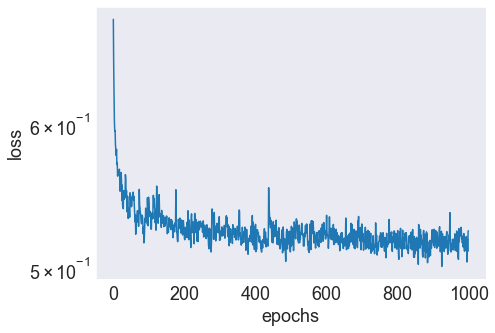

In [120]:
plt.rcParams['figure.figsize'] = 7, 5
grid = sns.lineplot(data = history1.history['loss'])
grid.set(yscale='log')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

<font color=#00008B><font size="5">We have a pretty standard loss vs epoch curve. It is good to see loss decreasing as the number of eochs increases.

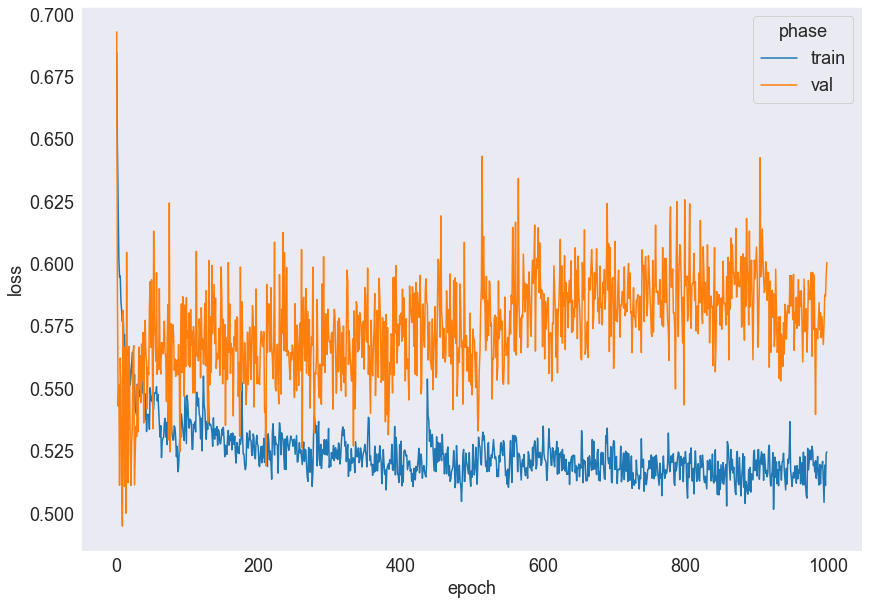

In [121]:

plt.rcParams['figure.figsize'] = 14, 10

df = pd.DataFrame(history1.history)
df['epoch'] = df.index
val_cols = [x for x in df.columns if x.startswith('val')]
df_val = df[val_cols+['epoch']]
df.drop(columns=val_cols, inplace=True)
df_val.rename(columns={col: col.split('val_')[-1] for col in df_val.columns}, inplace=True)
df['phase'] = 'train'
df_val['phase'] = 'val'
hist_df = pd.concat([df, df_val], ignore_index=True)

fig, axes = plt.subplots()

sns.lineplot(data = hist_df, x='epoch', y='loss', hue='phase')

plt.show()


<font color=#00008B><font size="4">The validation loss vs epoch curve is seen to be fluctuting quite a bit. This suggests that there is still a certain degree of <font color=#D4AC0D><font size="4">overfitting.<font color=#00008B><font size="4"> We might be able to combat this by using early stopping, increasing dropout even further or by reducing model complexity. 
<br>
<font color=#FF7F50><font size="4"> However, further throrough tuning is needed to find the "sweet spot".

In [122]:
y_pred = model.predict(X_test)
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.53      0.68       539
           1       0.16      0.78      0.26        60

    accuracy                           0.55       599
   macro avg       0.56      0.66      0.47       599
weighted avg       0.88      0.55      0.64       599



<AxesSubplot:>

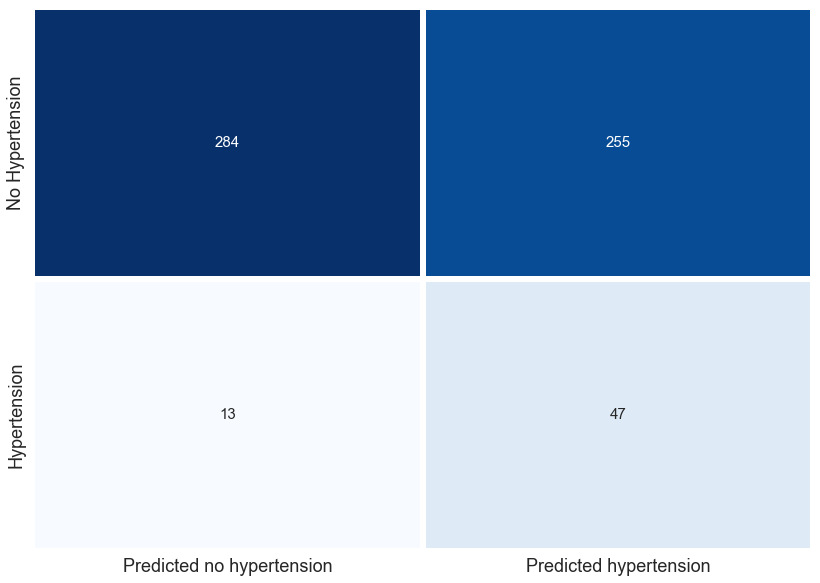

In [123]:
y_pred = model.predict(X_test)
ann_cm = confusion_matrix(y_test, np.around(y_pred))
sns.heatmap(ann_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">as seen from our classification report,
- <font color='blood red'><font size="4"> Our recall score for hypertension=0 is decent. 
-<font color='blood red'><font size="4">But for hyertension = 1 Recall score is mediocre.
  

## Using SHAP to determine feature importance in Neural Network! 

<font color='Pink'><font size="5">Neural Networks are normally seen as black boxes where it is difficut to have insights on the feature. Howerver with SHAP, we can now determine the feature importances!

In [124]:
e = shap.KernelExplainer(model, sample)
shap_values = e.shap_values(X_test)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  0%|          | 0/599 [00:00<?, ?it/s]

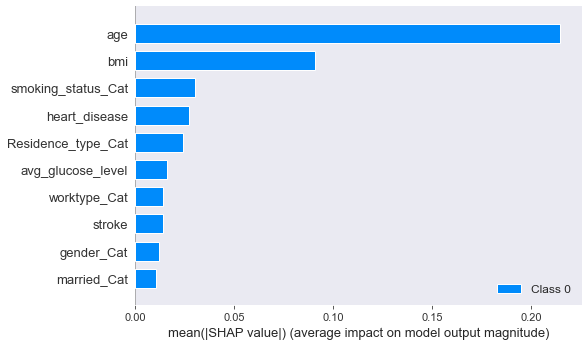

In [125]:
shap.summary_plot(shap_values,sample)

<font color='purple'><font size="4">From the figure, we can see that <font color=' red'>age is the strongest predictor followed by bmi and smoking_status.
  

<a id='4.6'></a>
<div>
<img src="HeaderImages/XGBoost.png" width="500"/>
</div>

# eXtreme Gradient Boosting Classifier (XGBoost)

<font color=#B22222><font size="4">
Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.<br><br>
<font color=#8B008B><font size="4">
XGBoost initially started as a research project by Tianqi Chen as part of the Distributed (Deep) Machine Learning Community (DMLC) group. Initially, it began as a terminal application which could be configured using a libsvm configuration file. It became well known in the ML competition circles after its use in the winning solution of the Higgs Machine Learning Challenge.

In [126]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       539
           1       0.17      0.20      0.18        60

    accuracy                           0.82       599
   macro avg       0.54      0.55      0.54       599
weighted avg       0.83      0.82      0.83       599



In [127]:
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp3['importance'] = xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

<font color=#800080><font size="4">XGBoost picked up: <font color=#800000><font size="4">age, smoking_status, bmi and residence_type <font color=#800080><font size="4">as top 4 important features. <br>
<font color='orange'><font size="4"> However, the feature importance index are very close and cannot really tell us too much.

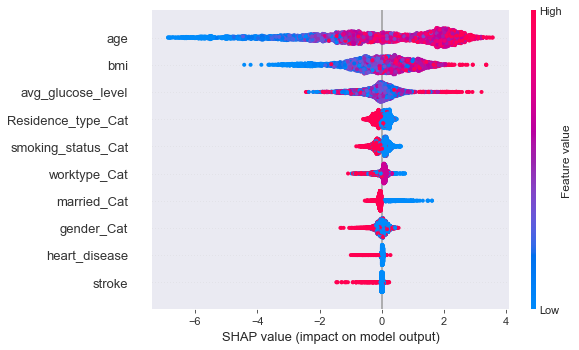

In [128]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_train_balanced)

# visualize the first prediction's explanation
shap.plots.beeswarm(shap_values)

<font color=#800080><font size="4"> SHAP has picked up  <font color=#800000><font size="4">age, bmi and avg_glucose level <font color=#800080><font size="4">as the 3 most important features.</font>

## If we use RFE wrapper on XGBoost:

In [129]:
rfe3 = RFE(estimator=xgb, n_features_to_select=4)
fit3 = rfe3.fit(X_train_balanced, Y_train_balanced)
print("Num Features: %s" % (fit3.n_features_))
features = {'Features': X_train_balanced_list,'Selected Features':fit3.support_ ,'Feature Ranking':fit3.ranking_}
rfe_df3 = pd.DataFrame(features)
rfe_df3

Num Features: 4


Features  Selected Features  Feature Ranking
0                 age               True                1
1       heart_disease               True                1
2   avg_glucose_level              False                7
3                 bmi              False                2
4              stroke              False                4
5          gender_Cat              False                5
6         married_Cat               True                1
7        worktype_Cat              False                3
8  Residence_type_Cat              False                6
9  smoking_status_Cat               True                1

<font color=#800080><font size="4">RFE on XGBoost selected <font color='blue'><font size="4">age, heart_disease, married_status and smoking status.

In [130]:
y_pred3 = fit3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       539
           1       0.16      0.12      0.13        60

    accuracy                           0.85       599
   macro avg       0.53      0.52      0.53       599
weighted avg       0.83      0.85      0.84       599



## Confusion Matrix of model using all featuers (No RFE):

<AxesSubplot:>

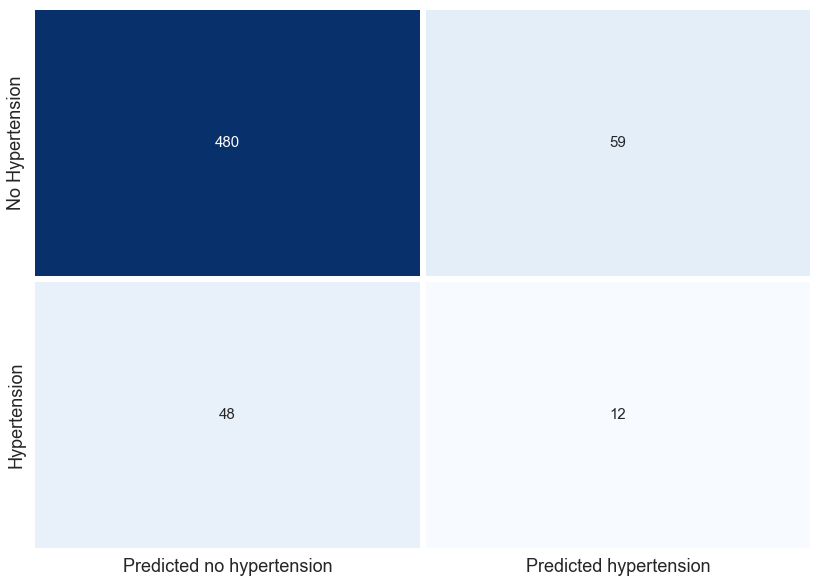

In [131]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">As seen from our classification report,
- <font color='blood red'><font size="4"> our recall score for hypertension = 0 is very good but very bad for hypertension = 1.


<a id='4.7'></a>
<div>
<img src="HeaderImages/KNN.png" width="500"/>
</div>

<a id='4.6'></a>
# K Nearest Neighbours (KNN)


<font color=#5F9EA0><font size="4">In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). <br>
    If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 65, metric = 'minkowski', p = 2)
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72       539
           1       0.16      0.72      0.26        60

    accuracy                           0.60       599
   macro avg       0.55      0.65      0.49       599
weighted avg       0.87      0.60      0.68       599



<AxesSubplot:>

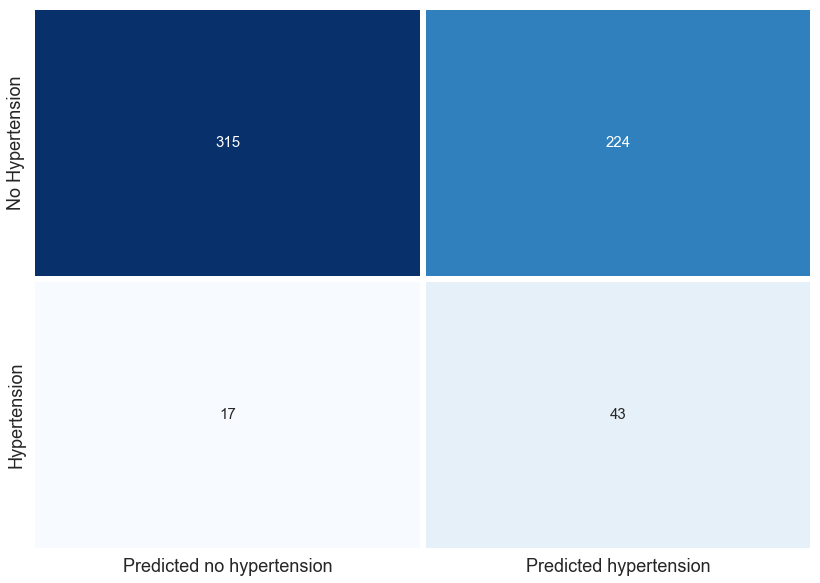

In [133]:
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5"> We use the square root of the number of samples we have which is sqrt(4280) = 65. </font><br><br>
<font color='blood red'><font size="5">As seen from our classification report,
- <font color='blood red'><font size="4"> our recall score for hypertension = 1 is decent but for hypertension = 0 recall is moderate.


<font color='blue'><font size="4">Again, we repeat but this time we use grid search to determine the best hyperparemter for recall

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, verbose=1, scoring='recall')
grid_search=grid.fit(X_train_balanced, Y_train_balanced)
print(grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'n_neighbors': 3}


In [140]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       539
           1       0.18      0.42      0.25        60

    accuracy                           0.75       599
   macro avg       0.55      0.60      0.55       599
weighted avg       0.85      0.75      0.79       599



<AxesSubplot:>

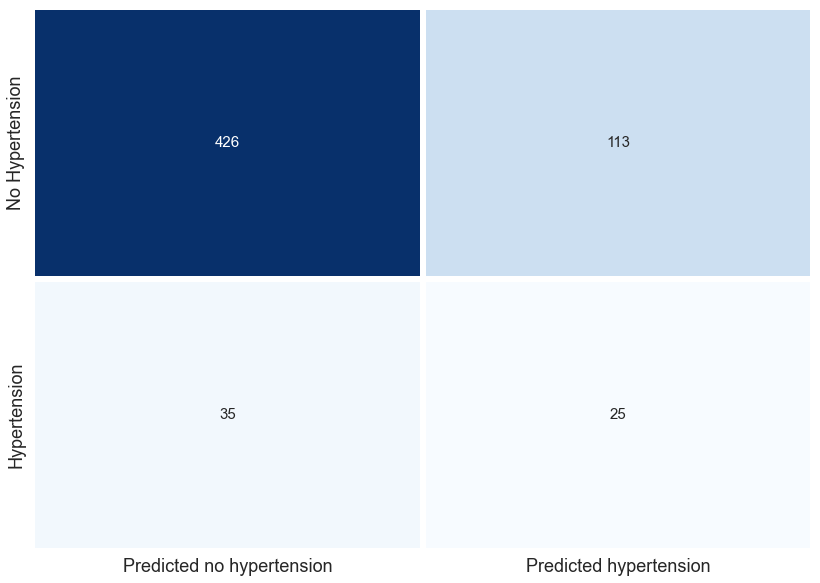

In [141]:
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5"> We use the predicted best n_neighbours hyperparameter value grid search found, which is 3. </font><br><br>
<font color='blood red'><font size="5">As seen from our classification report,
- <font color='blood red'><font size="4"> our recall score for hypertension = 0 is decent but for hypertension = 1 recall is bad


<a id='4.8'></a>
<div>
<img src="HeaderImages/NaiveBayes.png" width="500"/>
</div>

# Naive Bayes Classifier 

<font color=#5F9EA0><font size="4">In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. </font>

In [137]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train_balanced, Y_train_balanced)
y_pred = gauss.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.59      0.73       539
           1       0.17      0.73      0.27        60

    accuracy                           0.60       599
   macro avg       0.56      0.66      0.50       599
weighted avg       0.87      0.60      0.68       599



## Permutation importance

<font color='green'><font size="4">Since GaussianNB does not have an in-built feature importance evaluation method, we use permutation importance </font>

In [138]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(gauss, X_train_balanced, Y_train_balanced)

importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
features = X_train_balanced_list
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. age (0.112169)
2. bmi (0.034974)
3. married_Cat (0.009150)
4. stroke (0.008453)
5. Residence_type_Cat (0.006503)
6. heart_disease (0.005759)
7. gender_Cat (0.005667)
8. worktype_Cat (0.003019)
9. smoking_status_Cat (0.001161)
10. avg_glucose_level (0.000557)


## Confusion Matrix 

<AxesSubplot:>

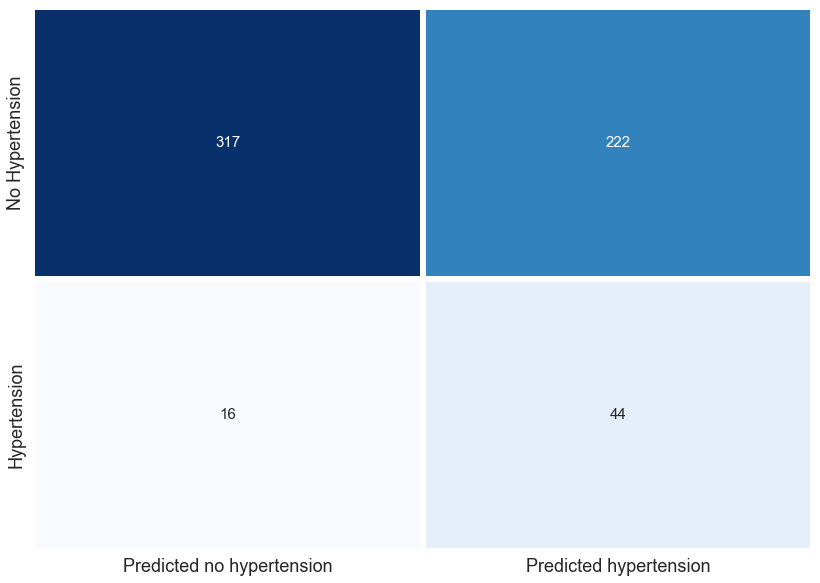

In [139]:
nb_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(nb_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Hypertension', 'Hypertension'], xticklabels = ['Predicted no hypertension', 'Predicted hypertension'])

<font color='blood red'><font size="5">As seen from our classification report,
- <font color='blood red'><font size="4"> our recall score for hypertension = 0 is decent and recall score for hypertension = 1 is very good.


<a id='5'></a>
<div>
<img src="HeaderImages/FinalThoughts.png" width="500"/>
</div>

## Final Thoughts 

<font color=#4B0082><font size="4">RFE, in-built Feature Importance methods and SHAP are used to determine feature importance so that we can gain insight on what are the main predictors of Hypertension. 
<br>
RFE is a feature selection technique and we use RFE to determine the more important features that our model needs, which also suggests the importance of that particular feature on predicting Hypertension.
<br><br>
In-built feature importance methods and SHAP can directly give us feature importance
 
<br>
<font color='blue'><font size="4">Comparing the feature importance of some of the models, <font color='Red'>age and BMI <font color='blue'><font size="4">seems to be the biggest predictors of Hypertension. <br><br>
  
<font color=#283747><font size="4">The common feature picked up unanimously is age. This suggests that the risk of Hypertension is unavoidable as people grow older. As such, it is of great importance we hold a more serious view towards hypertension as we grow older.
    
BMI is also another important predictor of Hypertension. Thus, it is suggested that we manage our weight and try to stay within the healthy range of BMI to decreaase the risk of Hypertension.

<font color=#AF601A><font size="4"> Other predictors of Hypertension include average glucose level, if the person suffered from stroke before/is currently suffering frorm stroke and the presence of heart disease.
   - To manage glucose level, risk of stroke and heart diseases, it is recommended we exercise regularly, manage our carb intake, and eat more fiber.
    
   
   
<font color='red'><font size="4">However we must also realise that these predictors are only from the dataset we have, and there might be other more important predictors in real life not used in this dataset.



<font color=#4B0082><font size="4">Since there is a great danger in diagnosing someone as having no hypertension when he has hypertension in reality (False Negative) we shall compare mainly on Recall score of Hypertension = 1. Recall shall be the model metric we prioritise to select our best model when there is a high cost associated with False Negative.<br><br> However, this does not mean we totally discount the other metrics.
<font color='blood red'><font size="4">Based on the insights of every model we have used Decision Tree seems to have the highest Recall score for Hypertension = 1. However, all its other metrics including accuracy are quite bad. As such, we should look for better options. It is too large a trade-off to choose Decision Tree just because it. has good Recall score for hyptertension = 1. Our next best options are K-Nearest Neighbours (n=65/ or sqrt(n) depending on value of n), Naive Bayes Classifier and Logistic Regression. Indeed, they are better models with good recall without totally sacrificing scores of other metrics. However, we want to also choose a model with huge potential in scalability so that we can potentially reach extremely good levels of perdictions. If we currently lack resources to run more complicated models, these models chosen would suffice.
    
- <font color=#2F4F4F><font size="4"> We choose the <font color=#663399><font size="4">Artificial Neural Network <font color=#2F4F4F><font size="4">if we have enough available resources. It has potential to be much better at predicting hypertension if we were to better tune the hyperparameters, modify the Neural Network Architecture or have greater hardware to run more complicated/ensemble models. Especially for such a complex and important problem like predicting hypertension, we might also be able to utilise transfer learning. If we were to choose a model for real-life use where every prediction is extremely important, we would choose a Deep Learning approach.
    